# *Please scroll down for Milestone #5*

### ---------------------------------------------------------------------------------

# Milesone #2 - Maddie Bauer

### The 5 data transformation and/or cleaning steps I performed include:
#### 1. Checking for missing data
#### 2. Dropping a column & Renaming a column
#### 3. Converting Celsius temperatures to Fahrenheit
#### 4. Checking for duplicates
#### 5. Checking for outliers

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [398]:
# import dataset
df = pd.read_csv('Avg_World_Temp_2020.csv')

In [399]:
# Check to see what df looks like
df.head()

Unnamed: 0  Country         City   Jan   Feb   Mar   Apr   May   Jun   Jul  \
0           0  Algeria      Algiers  11.2  11.9  12.8  14.7  17.7  21.3  24.6   
1           1  Algeria  Tamanrasset  12.8  15.0  18.1  22.2  26.1  28.9  28.7   
2           2  Algeria      Reggane  16.0  18.2  23.1  27.9  32.2  36.4  39.8   
3           3   Angola       Luanda  26.7  28.5  28.6  28.2  27.0  23.9  22.1   
4           4    Benin      Cotonou  27.3  28.5  28.9  28.6  27.8  26.5  25.8   

    Aug   Sep   Oct   Nov   Dec  Avg_Year Continent  
0  25.2  23.2  19.4  15.2  12.1      17.4    Africa  
1  28.2  26.5  22.4  17.3  13.9      21.7    Africa  
2  38.4  35.5  29.2  22.0  17.8      28.3    Africa  
3  22.1  23.5  25.2  26.7  26.9      25.8    Africa  
4  25.6  26.0  26.7  27.6  27.3      27.2    Africa

In [400]:
df.shape

(424, 17)

### Currently, the df has 424 observations (rows) and 17 variables (columns)

In [401]:
# Check for missing values in df
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing value(s)".format(c, miss))
    else:
        print("{} has NO missing values.".format(c))
            

Unnamed: 0 has NO missing values.
Country has NO missing values.
City has NO missing values.
Jan has NO missing values.
Feb has NO missing values.
Mar has NO missing values.
Apr has NO missing values.
May has NO missing values.
Jun has NO missing values.
Jul has NO missing values.
Aug has NO missing values.
Sep has NO missing values.
Oct has NO missing values.
Nov has NO missing values.
Dec has NO missing values.
Avg_Year has NO missing values.
Continent has NO missing values.


### There is no missing data.

In [402]:
# Checking the column names
print(df.columns)

Index(['Unnamed: 0', 'Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg_Year',
       'Continent'],
      dtype='object')


In [403]:
# Dropping the first column becuase it's not needed
del df['Unnamed: 0']

In [404]:
# Rename Avg_Year to Avg_Temp_Yr
dff = df.rename(columns={'Avg_Year': 'Avg_Temp_Yr'})
dff.columns

Index(['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg_Temp_Yr', 'Continent'],
      dtype='object')

In [405]:
# checking the structure of each variable
dff.dtypes

Country         object
City            object
Jan            float64
Feb            float64
Mar            float64
Apr            float64
May            float64
Jun            float64
Jul            float64
Aug            float64
Sep            float64
Oct            float64
Nov            float64
Dec            float64
Avg_Temp_Yr    float64
Continent       object
dtype: object

In [406]:
# Convert temperatures to Fahrenheit

def convert_to_F(x):
    x = (x * 9/5) + 32
    return float(x)


In [407]:
# check that my function works correctly: 0 degrees C = 32 degrees F
convert_to_F(0)

32.0

In [408]:
dff['Jan'] = dff['Jan'].apply(convert_to_F)

In [409]:
dff['Feb'] = dff['Feb'].apply(convert_to_F)

In [410]:
dff['Mar'] = dff['Mar'].apply(convert_to_F)

In [411]:
dff['Apr'] = dff['Apr'].apply(convert_to_F)

In [412]:
dff['May'] = dff['May'].apply(convert_to_F)

In [413]:
dff['Jun'] = dff['Jun'].apply(convert_to_F)

In [414]:
dff['Jul'] = dff['Jul'].apply(convert_to_F)

In [415]:
dff['Aug'] = dff['Aug'].apply(convert_to_F)

In [416]:
dff['Sep'] = dff['Sep'].apply(convert_to_F)

In [417]:
dff['Oct'] = dff['Oct'].apply(convert_to_F)

In [418]:
dff['Nov'] = dff['Nov'].apply(convert_to_F)

In [419]:
dff['Dec'] = dff['Dec'].apply(convert_to_F)

In [420]:
dff['Avg_Temp_Yr'] = dff['Avg_Temp_Yr'].apply(convert_to_F)

In [421]:
dff.head(10)

Country            City    Jan    Feb    Mar    Apr    May    Jun     Jul  \
0   Algeria         Algiers  52.16  53.42  55.04  58.46  63.86  70.34   76.28   
1   Algeria     Tamanrasset  55.04  59.00  64.58  71.96  78.98  84.02   83.66   
2   Algeria         Reggane  60.80  64.76  73.58  82.22  89.96  97.52  103.64   
3    Angola          Luanda  80.06  83.30  83.48  82.76  80.60  75.02   71.78   
4     Benin         Cotonou  81.14  83.30  84.02  83.48  82.04  79.70   78.44   
5     Benin         Parakou  79.70  83.66  85.28  84.20  81.50  78.98   77.18   
6     Benin    Kandi, Benin  76.82  82.04  87.62  89.78  86.72  82.58   79.52   
7  Botswana  Maun, Botswana  77.72  77.18  75.56  72.68  65.66  60.26   60.44   
8  Botswana        Gaborone  78.80  77.00  75.20  69.80  62.60  55.40   55.40   
9  Botswana          Ghanzi  78.62  77.54  75.38  70.16  63.68  57.74   57.38   

      Aug    Sep    Oct    Nov    Dec  Avg_Temp_Yr Continent  
0   77.36  73.76  66.92  59.36  53.78        63.32    Africa  
1   82.76  79.70  72.32  63.14  57.02        71.06    Africa  
2  101.12  95.90  84.56  71.60  64.04        82.94    Africa  
3   71.78  74.30  77.36  80.06  80.42        78.44    Africa  
4   78.08  78.80  80.06  81.68  81.14        80.96    Africa  
5   76.46  77.00  78.98  79.88  78.98        80.24    Africa  
6   78.80  79.16  82.04  79.70  76.64        81.86    Africa  
7   65.84  73.58  79.88  79.52  78.44        72.32    Africa  
8   62.60  69.80  73.40  77.00  77.00        69.80    Africa  
9   62.78  70.70  76.28  78.26  78.98        70.52    Africa

### I manually checked the calculations for random data points. It all checks out! The dataframe now is all temperatures in Fahrenheit.

#### I'm guessing I could have done the above conversion for each column as a for loop.. didn't think about it at the time, but now looking back I probably should have constructed a loop.

In [422]:
# Checking for duplicates in the City column
dff['City'].unique()

array(['Algiers', 'Tamanrasset', 'Reggane', 'Luanda', 'Cotonou',
       'Parakou', 'Kandi, Benin', 'Maun, Botswana', 'Gaborone', 'Ghanzi',
       'Ouagadougou', 'Ouahigouya', 'Bujumbura', 'Garoua', 'Ngaoundéré',
       'Douala', 'Yaoundé', 'Praia', 'Bangui', 'Birao', "N'Djamena",
       'Abéché', 'Kinshasa', 'Lubumbashi', 'Djibouti (city)', 'Cairo',
       'Alexandria', 'Bata, Equatorial Guinea', 'Malabo', 'Asmara',
       'Assab', "Mek'ele", 'Addis Ababa', 'Libreville', 'Port-Gentil',
       'Banjul', 'Accra', 'Tamale, Ghana', 'Kumasi', 'Conakry', 'Kankan',
       'Bissau', 'Gagnoa', 'Bouaké', 'Abidjan', 'Odienné', 'Mombasa',
       'Nairobi', 'Garissa', 'Lodwar', 'Tripoli', 'Benghazi',
       'Fianarantsoa', 'Toamasina', 'Antananarivo', 'Antsiranana',
       'Mahajanga', 'Toliara', 'Karonga', 'Blantyre', 'Mzuzu', 'Ségou',
       'Timbuktu', 'Bamako', 'Nouadhibou', 'Nouakchott', 'Rabat',
       'Marrakesh', 'Ouarzazate', 'Maputo', 'Niamey', 'Lagos', 'Makurdi',
       'Jos', 'Kano', 'S

In [423]:
dff['City'].nunique()

424

### Since there are 424 unique 'City' names, and 424 observations (rows) in total, there are no duplicates.

In [424]:
any(dff.City.duplicated())

False

### The above code also proves that there are no duplicated Cities in this dataset. The countries and continents will be repeated, but that's okay. 

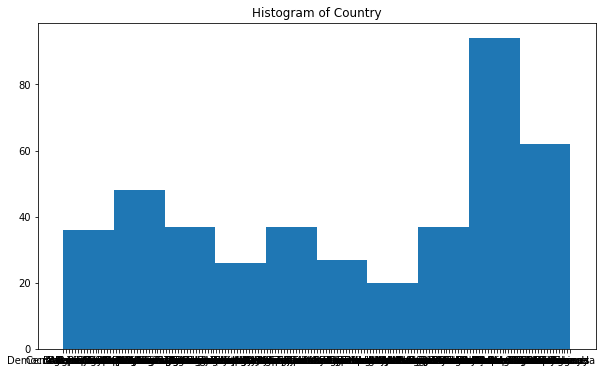

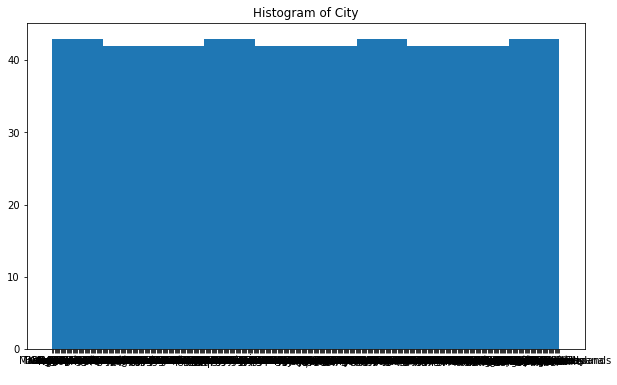

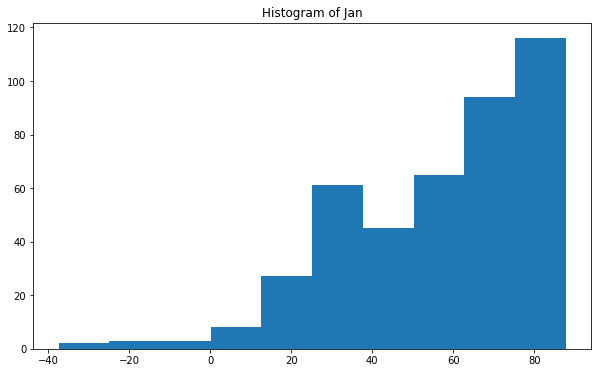

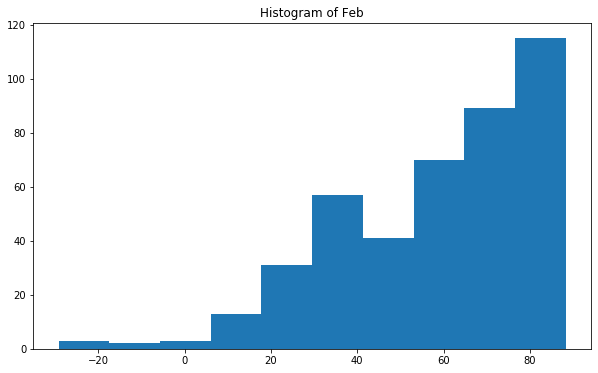

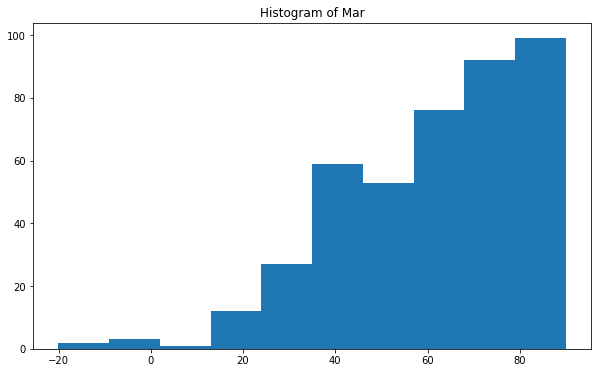

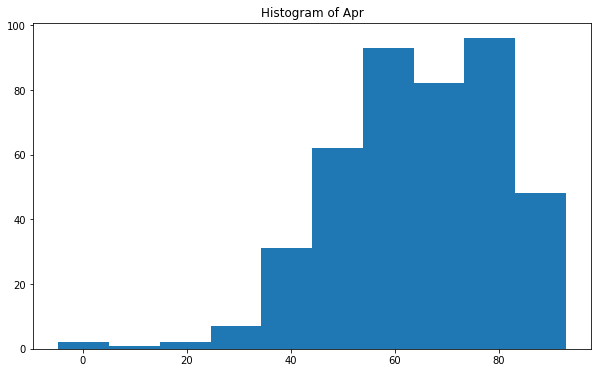

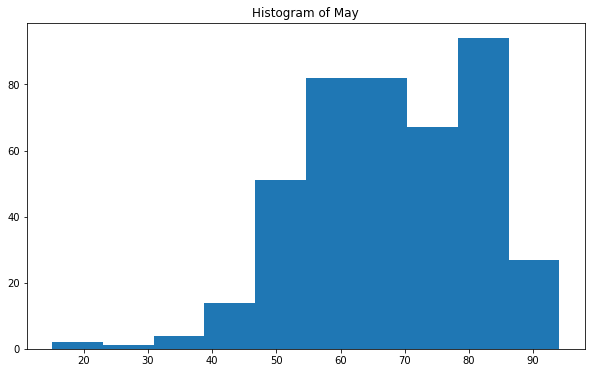

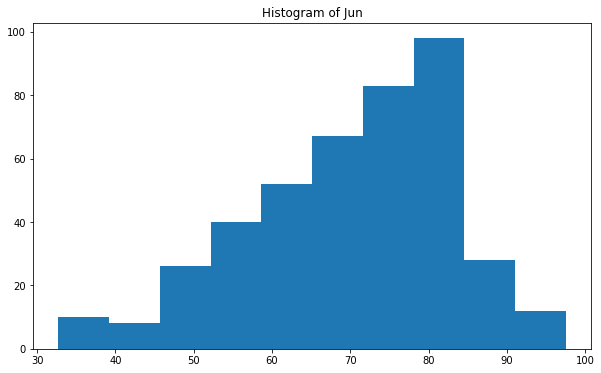

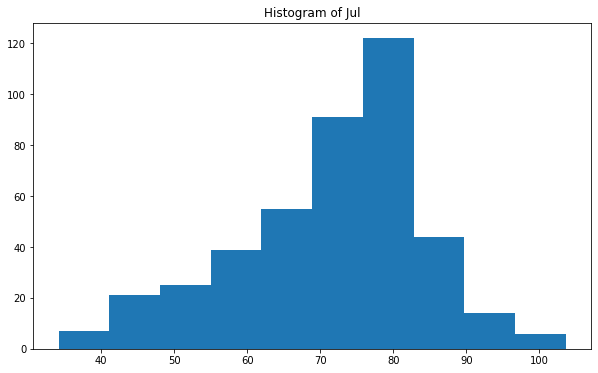

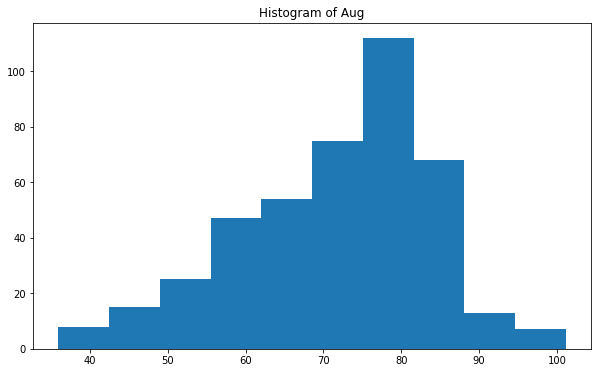

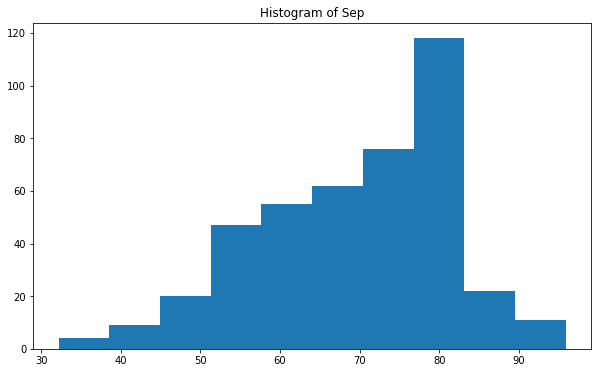

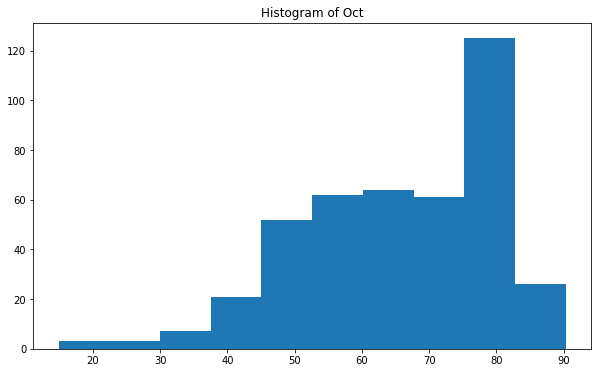

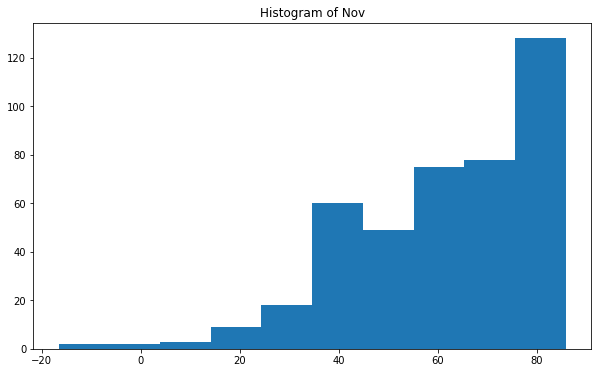

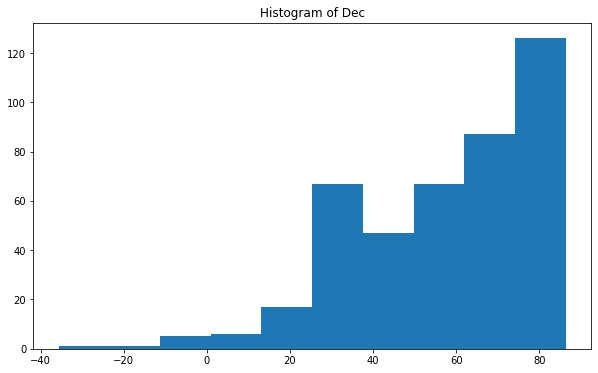

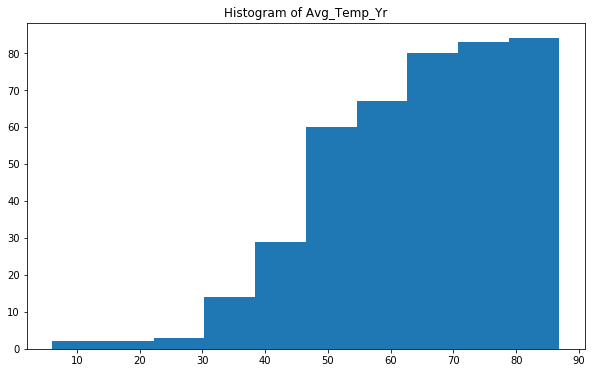

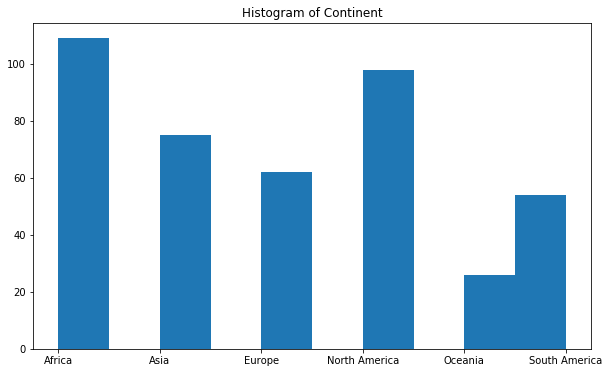

In [425]:
# Create histograms of each Month
for c in dff.columns:
    plt.hist(dff[c])
    plt.title("Histogram of " + c, fontsize = 12)
    plt.show()

#### It seems like maybe there are a lot of warmer climate areas within this dataset based on the histograms.

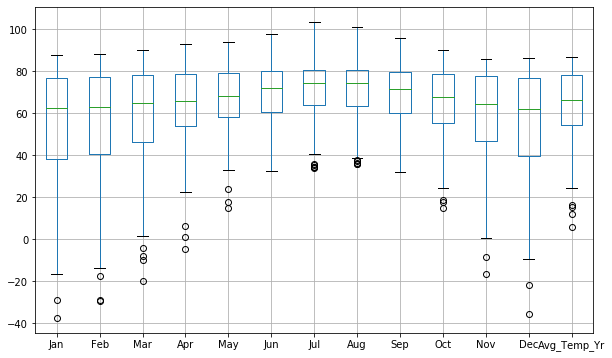

In [426]:
box = pd.DataFrame(data = dff, columns = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg_Temp_Yr'])
box.boxplot()

### The spread of temperatures looks like it ranges from roughly -40 degrees to 100 degrees for all months combined. The winter months do have the lowest temps, as expected, so I don't necessary think any of these are outliers. 

In [427]:
# final dataframe here is dff

# Milestone 3 - Maddie Bauer

### The 5 data transformation and/or cleaning steps I performed include:
#### 1. Replace headers / Renamed columns
#### 2. Checking for Missing Data 
#### 3. Dropped a Row
#### 4. Checked for Duplicates
#### 5. Fixed inconsistent city names (hyperlinks from wikipedia table)

In [428]:
from bs4 import BeautifulSoup
import pandas as pd

In [429]:
with open("List of United States cities by population - Wikipedia.html", "r", encoding="utf-8") as fd:
    soup=BeautifulSoup(fd)

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of United States cities by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f6d46b0b-5ad5-40b7-aaff-473e212189d6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_United_States_cities_by_population","wgTitle":"List of United States cities by population","wgCurRevisionId":961764896,"wgRevisionId":961764896,"wgArticleId":1649321,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Wikipedia indefinitely semi-pr

In [430]:
# Find how many tables are on webpage.

all_tables = soup.find_all("table")
print("There are {} tables.".format(len(all_tables)))

There are 12 tables.


In [431]:
# find the right (correct) table using bs4
# singling out the table we need

table = soup.find("table", {"class": "wikitable sortable"})
print(type(table))

<class 'bs4.element.Tag'>


In [432]:
print(table)

<table class="wikitable sortable" style="text-align:center">
<tbody><tr>
<th>2019<br/>rank
</th>
<th>City
</th>
<th>State<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
</th>
<th>2019<br/>estimate
</th>
<th>2010<br/>Census
</th>
<th>Change
</th>
<th colspan="2">2016 land area
</th>
<th colspan="2">2016 population density
</th>
<th>Location
</th></tr>
<tr>
<td>1
</td>
<td style="text-align:left;background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[d]</a></sup>
</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1137" data-file-width="2276" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_New_York.svg/23px-Flag_of_New_York.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_New_York.svg/35px-Flag_of_New_York.svg.png 1.5x, //upload.wikimedia.org

In [433]:
col_headers = [th.getText(strip=True) for th in table.findAll('th')]
col_headers

df_headers = pd.DataFrame(columns=col_headers)
df_headers
##You have a merged column header, so you will need to create two columns for those extra values that are in the data below

Empty DataFrame
Columns: [2019rank, City, State[c], 2019estimate, 2010Census, Change, 2016 land area, 2016 population density, Location]
Index: []

In [434]:
col_headers.insert(7, "2016 land area km")

In [435]:
col_headers.insert(9, "2016 population density km")

In [436]:
col_headers

['2019rank',
 'City',
 'State[c]',
 '2019estimate',
 '2010Census',
 'Change',
 '2016 land area',
 '2016 land area km',
 '2016 population density',
 '2016 population density km',
 'Location']

In [437]:
all_rows = table.find_all('tbody')[0].find_all('tr')
all_rows

[<tr>
 <th>2019<br/>rank
 </th>
 <th>City
 </th>
 <th>State<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[c]</a></sup>
 </th>
 <th>2019<br/>estimate
 </th>
 <th>2010<br/>Census
 </th>
 <th>Change
 </th>
 <th colspan="2">2016 land area
 </th>
 <th colspan="2">2016 population density
 </th>
 <th>Location
 </th></tr>,
 <tr>
 <td>1
 </td>
 <td style="text-align:left;background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[d]</a></sup>
 </td>
 <td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1137" data-file-width="2276" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_New_York.svg/23px-Flag_of_New_York.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_New_York.svg/35px-Flag_of_New_York.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_New_

In [438]:
data_rows = [[td.get_text().strip() for td in tr.find_all('td')] for tr in all_rows]
data_rows

[[],
 ['1',
  'New York[d]',
  'New York',
  '8,336,817',
  '8,175,133',
  '+1.98%',
  '301.5\xa0sq\xa0mi',
  '780.9\xa0km2',
  '28,317/sq\xa0mi',
  '10,933/km2',
  '40°39′49″N 73°56′19″W\ufeff / \ufeff40.6635°N 73.9387°W\ufeff / 40.6635; -73.9387\ufeff (1 New York City)'],
 ['2',
  'Los Angeles',
  'California',
  '3,979,576',
  '3,792,621',
  '+4.93%',
  '468.7\xa0sq\xa0mi',
  '1,213.9\xa0km2',
  '8,484/sq\xa0mi',
  '3,276/km2',
  '34°01′10″N 118°24′39″W\ufeff / \ufeff34.0194°N 118.4108°W\ufeff / 34.0194; -118.4108\ufeff (2 Los Angeles)'],
 ['3',
  'Chicago',
  'Illinois',
  '2,693,976',
  '2,695,598',
  '−0.06%',
  '227.3\xa0sq\xa0mi',
  '588.7\xa0km2',
  '11,900/sq\xa0mi',
  '4,600/km2',
  '41°50′15″N 87°40′54″W\ufeff / \ufeff41.8376°N 87.6818°W\ufeff / 41.8376; -87.6818\ufeff (3 Chicago)'],
 ['4',
  'Houston[3]',
  'Texas',
  '2,320,268',
  '2,100,263',
  '+10.48%',
  '637.5\xa0sq\xa0mi',
  '1,651.1\xa0km2',
  '3,613/sq\xa0mi',
  '1,395/km2',
  '29°47′12″N 95°23′27″W\ufeff / \ufef

In [439]:
city_rank_df = pd.DataFrame(data_rows, columns = col_headers)
city_rank_df.head(10)

2019rank             City      State[c] 2019estimate 2010Census   Change  \
0     None             None          None         None       None     None   
1        1      New York[d]      New York    8,336,817  8,175,133   +1.98%   
2        2      Los Angeles    California    3,979,576  3,792,621   +4.93%   
3        3          Chicago      Illinois    2,693,976  2,695,598   −0.06%   
4        4       Houston[3]         Texas    2,320,268  2,100,263  +10.48%   
5        5          Phoenix       Arizona    1,680,992  1,445,632  +16.28%   
6        6  Philadelphia[e]  Pennsylvania    1,584,064  1,526,006   +3.80%   
7        7      San Antonio         Texas    1,547,253  1,327,407  +16.56%   
8        8        San Diego    California    1,423,851  1,307,402   +8.91%   
9        9           Dallas         Texas    1,343,573  1,197,816  +12.17%   

  2016 land area 2016 land area km 2016 population density  \
0           None              None                    None   
1    301.5 sq mi         780.9 km2            28,317/sq mi   
2    468.7 sq mi       1,213.9 km2             8,484/sq mi   
3    227.3 sq mi         588.7 km2            11,900/sq mi   
4    637.5 sq mi       1,651.1 km2             3,613/sq mi   
5    517.6 sq mi       1,340.6 km2             3,120/sq mi   
6    134.2 sq mi         347.6 km2            11,683/sq mi   
7    461.0 sq mi       1,194.0 km2             3,238/sq mi   
8    325.2 sq mi         842.3 km2             4,325/sq mi   
9    340.9 sq mi         882.9 km2             3,866/sq mi   

  2016 population density km  \
0                       None   
1                 10,933/km2   
2                  3,276/km2   
3                  4,600/km2   
4                  1,395/km2   
5                  1,200/km2   
6                  4,511/km2   
7                  1,250/km2   
8                  1,670/km2   
9                  1,493/km2   

                                            Location  
0                                               None  
1  40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...  
2  34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...  
3  41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...  
4  29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...  
5  33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...  
6  40°00′34″N 75°08′00″W﻿ / ﻿40.0094°N 75.1333°W﻿...  
7  29°28′21″N 98°31′30″W﻿ / ﻿29.4724°N 98.5251°W﻿...  
8  32°48′55″N 117°08′06″W﻿ / ﻿32.8153°N 117.1350°...  
9  32°47′36″N 96°45′59″W﻿ / ﻿32.7933°N 96.7665°W﻿...

In [440]:
city_rank_df.shape

(318, 11)

### Currently, this city_rank_df has 318 observations (rows) and 11 variables (columns)

In [441]:
city_rank_df.columns

Index(['2019rank', 'City', 'State[c]', '2019estimate', '2010Census', 'Change',
       '2016 land area', '2016 land area km', '2016 population density',
       '2016 population density km', 'Location'],
      dtype='object')

In [442]:
# rename columns
city_rank_df = city_rank_df.rename(columns={'2019rank': 'Rank in 2019', 'State[c]': 'State', '2019estimate': '2019 Estimate', '2010Census': 
                            '2010 Census', 'Change': 'Percent Change', 
                             '2016 land area': '2016 Land Area (sq mi)', 
                             '2016 land area km': '2016 Land Area (sq km)', 
                             '2016 population density': '2016 Population Density (sq mi)', 
                             '2016 population density km': '2016 Population Density (sq km)'})

In [443]:
city_rank_df

Rank in 2019            City       State 2019 Estimate 2010 Census  \
0           None            None        None          None        None   
1              1     New York[d]    New York     8,336,817   8,175,133   
2              2     Los Angeles  California     3,979,576   3,792,621   
3              3         Chicago    Illinois     2,693,976   2,695,598   
4              4      Houston[3]       Texas     2,320,268   2,100,263   
..           ...             ...         ...           ...         ...   
313          313      San Angelo       Texas       101,004      93,200   
314          314       Vacaville  California       100,670      92,428   
315          315     Clinton[ae]    Michigan       100,471      96,796   
316          316            Bend      Oregon       100,421      76,639   
317          317  Woodbridge[ad]  New Jersey       100,145      99,585   

    Percent Change 2016 Land Area (sq mi) 2016 Land Area (sq km)  \
0             None                   None                   None   
1           +1.98%            301.5 sq mi              780.9 km2   
2           +4.93%            468.7 sq mi            1,213.9 km2   
3           −0.06%            227.3 sq mi              588.7 km2   
4          +10.48%            637.5 sq mi            1,651.1 km2   
..             ...                    ...                    ...   
313         +8.37%             59.9 sq mi              155.1 km2   
314         +8.92%             29.0 sq mi               75.1 km2   
315         +3.80%             28.1 sq mi               72.8 km2   
316        +31.03%             33.1 sq mi               85.7 km2   
317         +0.56%             23.3 sq mi               60.3 km2   

    2016 Population Density (sq mi) 2016 Population Density (sq km)  \
0                              None                            None   
1                      28,317/sq mi                      10,933/km2   
2                       8,484/sq mi                       3,276/km2   
3                      11,900/sq mi                       4,600/km2   
4                       3,613/sq mi                       1,395/km2   
..                              ...                             ...   
313                     1,681/sq mi                         649/km2   
314                     3,449/sq mi                       1,332/km2   
315                     3,573/sq mi                       1,380/km2   
316                     3,034/sq mi                       1,171/km2   
317                     4,351/sq mi                       1,680/km2   

                                              Location  
0                                                 None  
1    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...  
2    34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...  
3    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...  
4    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...  
..                                                 ...  
313  31°26′28″N 100°27′02″W﻿ / ﻿31.4411°N 100.4505°...  
314  38°21′14″N 121°58′22″W﻿ / ﻿38.3539°N 121.9728°...  
315  42°35′25″N 82°55′01″W﻿ / ﻿42.5903°N 82.9170°W﻿...  
316  44°03′00″N 121°18′00″W﻿ / ﻿44.0500°N 121.3000°...  
317  40°33′39″N 74°17′34″W﻿ / ﻿40.5607°N 74.2927°W﻿...  

[318 rows x 11 columns]

In [444]:
# Check for missing data
for c in city_rank_df.columns:
    miss = city_rank_df[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing value(s)".format(c, miss))
    else:
        print("{} has NO missing values.".format(c))

Rank in 2019 has 1 missing value(s)
City has 1 missing value(s)
State has 1 missing value(s)
2019 Estimate has 1 missing value(s)
2010 Census has 1 missing value(s)
Percent Change has 1 missing value(s)
2016 Land Area (sq mi) has 1 missing value(s)
2016 Land Area (sq km) has 1 missing value(s)
2016 Population Density (sq mi) has 1 missing value(s)
2016 Population Density (sq km) has 1 missing value(s)
Location has 2 missing value(s)


In [445]:
# Drop row 0 then check for missing values again.

new = city_rank_df.drop(city_rank_df.index[[0]])

In [446]:
# row 0 has been deleted
new

Rank in 2019            City       State 2019 Estimate 2010 Census  \
1              1     New York[d]    New York     8,336,817   8,175,133   
2              2     Los Angeles  California     3,979,576   3,792,621   
3              3         Chicago    Illinois     2,693,976   2,695,598   
4              4      Houston[3]       Texas     2,320,268   2,100,263   
5              5         Phoenix     Arizona     1,680,992   1,445,632   
..           ...             ...         ...           ...         ...   
313          313      San Angelo       Texas       101,004      93,200   
314          314       Vacaville  California       100,670      92,428   
315          315     Clinton[ae]    Michigan       100,471      96,796   
316          316            Bend      Oregon       100,421      76,639   
317          317  Woodbridge[ad]  New Jersey       100,145      99,585   

    Percent Change 2016 Land Area (sq mi) 2016 Land Area (sq km)  \
1           +1.98%            301.5 sq mi              780.9 km2   
2           +4.93%            468.7 sq mi            1,213.9 km2   
3           −0.06%            227.3 sq mi              588.7 km2   
4          +10.48%            637.5 sq mi            1,651.1 km2   
5          +16.28%            517.6 sq mi            1,340.6 km2   
..             ...                    ...                    ...   
313         +8.37%             59.9 sq mi              155.1 km2   
314         +8.92%             29.0 sq mi               75.1 km2   
315         +3.80%             28.1 sq mi               72.8 km2   
316        +31.03%             33.1 sq mi               85.7 km2   
317         +0.56%             23.3 sq mi               60.3 km2   

    2016 Population Density (sq mi) 2016 Population Density (sq km)  \
1                      28,317/sq mi                      10,933/km2   
2                       8,484/sq mi                       3,276/km2   
3                      11,900/sq mi                       4,600/km2   
4                       3,613/sq mi                       1,395/km2   
5                       3,120/sq mi                       1,200/km2   
..                              ...                             ...   
313                     1,681/sq mi                         649/km2   
314                     3,449/sq mi                       1,332/km2   
315                     3,573/sq mi                       1,380/km2   
316                     3,034/sq mi                       1,171/km2   
317                     4,351/sq mi                       1,680/km2   

                                              Location  
1    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...  
2    34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...  
3    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...  
4    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...  
5    33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...  
..                                                 ...  
313  31°26′28″N 100°27′02″W﻿ / ﻿31.4411°N 100.4505°...  
314  38°21′14″N 121°58′22″W﻿ / ﻿38.3539°N 121.9728°...  
315  42°35′25″N 82°55′01″W﻿ / ﻿42.5903°N 82.9170°W﻿...  
316  44°03′00″N 121°18′00″W﻿ / ﻿44.0500°N 121.3000°...  
317  40°33′39″N 74°17′34″W﻿ / ﻿40.5607°N 74.2927°W﻿...  

[317 rows x 11 columns]

In [447]:
# Check for missing data
for c in new.columns:
    miss = new[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing value(s)".format(c, miss))
    else:
        print("{} has NO missing values.".format(c))

Rank in 2019 has NO missing values.
City has NO missing values.
State has NO missing values.
2019 Estimate has NO missing values.
2010 Census has NO missing values.
Percent Change has NO missing values.
2016 Land Area (sq mi) has NO missing values.
2016 Land Area (sq km) has NO missing values.
2016 Population Density (sq mi) has NO missing values.
2016 Population Density (sq km) has NO missing values.
Location has 1 missing value(s)


### After deleting row 0, there is less missing data.

In [448]:
new['Location'].isnull().sum()

1

In [449]:
clean_df = new.dropna()

In [450]:
clean_df

Rank in 2019            City       State 2019 Estimate 2010 Census  \
1              1     New York[d]    New York     8,336,817   8,175,133   
2              2     Los Angeles  California     3,979,576   3,792,621   
3              3         Chicago    Illinois     2,693,976   2,695,598   
4              4      Houston[3]       Texas     2,320,268   2,100,263   
5              5         Phoenix     Arizona     1,680,992   1,445,632   
..           ...             ...         ...           ...         ...   
313          313      San Angelo       Texas       101,004      93,200   
314          314       Vacaville  California       100,670      92,428   
315          315     Clinton[ae]    Michigan       100,471      96,796   
316          316            Bend      Oregon       100,421      76,639   
317          317  Woodbridge[ad]  New Jersey       100,145      99,585   

    Percent Change 2016 Land Area (sq mi) 2016 Land Area (sq km)  \
1           +1.98%            301.5 sq mi              780.9 km2   
2           +4.93%            468.7 sq mi            1,213.9 km2   
3           −0.06%            227.3 sq mi              588.7 km2   
4          +10.48%            637.5 sq mi            1,651.1 km2   
5          +16.28%            517.6 sq mi            1,340.6 km2   
..             ...                    ...                    ...   
313         +8.37%             59.9 sq mi              155.1 km2   
314         +8.92%             29.0 sq mi               75.1 km2   
315         +3.80%             28.1 sq mi               72.8 km2   
316        +31.03%             33.1 sq mi               85.7 km2   
317         +0.56%             23.3 sq mi               60.3 km2   

    2016 Population Density (sq mi) 2016 Population Density (sq km)  \
1                      28,317/sq mi                      10,933/km2   
2                       8,484/sq mi                       3,276/km2   
3                      11,900/sq mi                       4,600/km2   
4                       3,613/sq mi                       1,395/km2   
5                       3,120/sq mi                       1,200/km2   
..                              ...                             ...   
313                     1,681/sq mi                         649/km2   
314                     3,449/sq mi                       1,332/km2   
315                     3,573/sq mi                       1,380/km2   
316                     3,034/sq mi                       1,171/km2   
317                     4,351/sq mi                       1,680/km2   

                                              Location  
1    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...  
2    34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...  
3    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...  
4    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...  
5    33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...  
..                                                 ...  
313  31°26′28″N 100°27′02″W﻿ / ﻿31.4411°N 100.4505°...  
314  38°21′14″N 121°58′22″W﻿ / ﻿38.3539°N 121.9728°...  
315  42°35′25″N 82°55′01″W﻿ / ﻿42.5903°N 82.9170°W﻿...  
316  44°03′00″N 121°18′00″W﻿ / ﻿44.0500°N 121.3000°...  
317  40°33′39″N 74°17′34″W﻿ / ﻿40.5607°N 74.2927°W﻿...  

[316 rows x 11 columns]

In [451]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 1 to 317
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Rank in 2019                     316 non-null    object
 1   City                             316 non-null    object
 2   State                            316 non-null    object
 3   2019 Estimate                    316 non-null    object
 4   2010 Census                      316 non-null    object
 5   Percent Change                   316 non-null    object
 6   2016 Land Area (sq mi)           316 non-null    object
 7   2016 Land Area (sq km)           316 non-null    object
 8   2016 Population Density (sq mi)  316 non-null    object
 9   2016 Population Density (sq km)  316 non-null    object
 10  Location                         316 non-null    object
dtypes: object(11)
memory usage: 29.6+ KB


In [452]:
# check for duplicates

In [453]:
any(clean_df.City.duplicated())

True

In [454]:
clean_df.City.value_counts()

Springfield     3
Pasadena        2
Columbia        2
Peoria          2
Aurora          2
               ..
Clearwater      1
Durham          1
Broken Arrow    1
Visalia         1
Vancouver       1
Name: City, Length: 308, dtype: int64

In [455]:
duplicateRowsDF = clean_df[clean_df.duplicated(['City'])]
print("Duplicate Rows based on a City column are:", duplicateRowsDF.City, sep='\n')

Duplicate Rows based on a City column are:
119       Glendale
124         Aurora
167    Springfield
192       Pasadena
227       Columbia
237      Rochester
256    Springfield
273         Peoria
Name: City, dtype: object


In [456]:
duplicateRowsDF = clean_df[clean_df.duplicated(['City'])]
print("Duplicate Rows based on a City column are:", duplicateRowsDF.State, sep='\n')

Duplicate Rows based on a City column are:
119       California
124         Illinois
167    Massachusetts
192       California
227         Missouri
237        Minnesota
256         Illinois
273         Illinois
Name: State, dtype: object


#### There are duplicates for a few city names, but they do not have the same State listed. So, technically there are no duplicated City/State combinations.

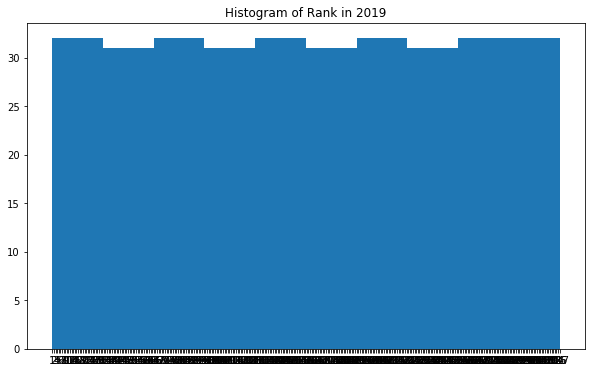

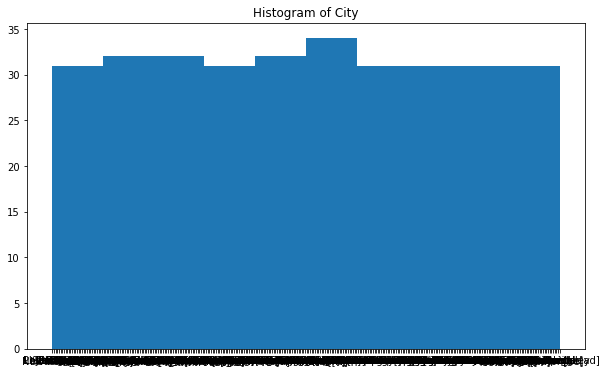

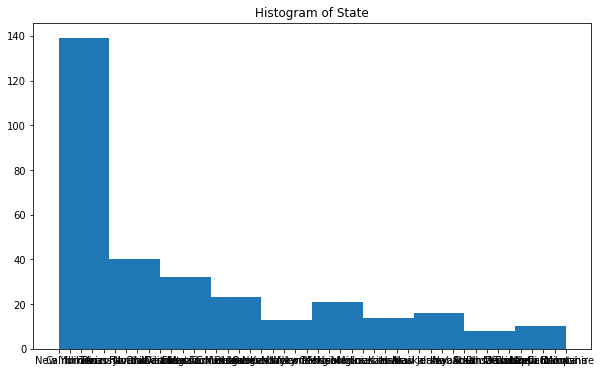

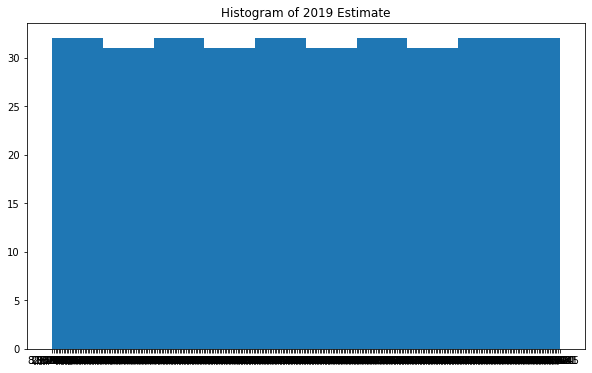

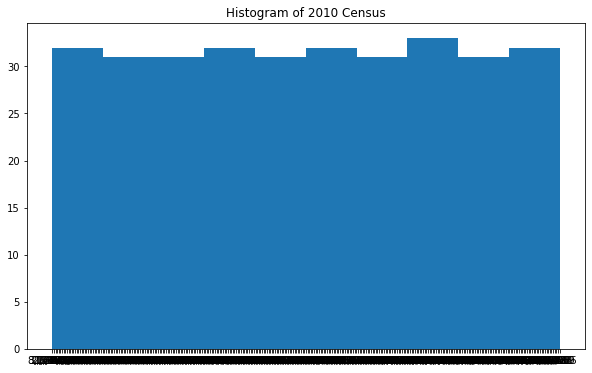

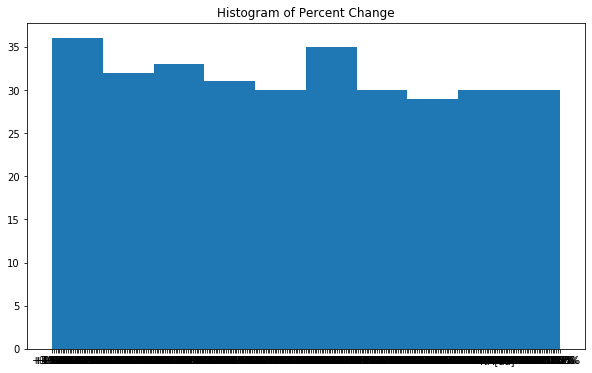

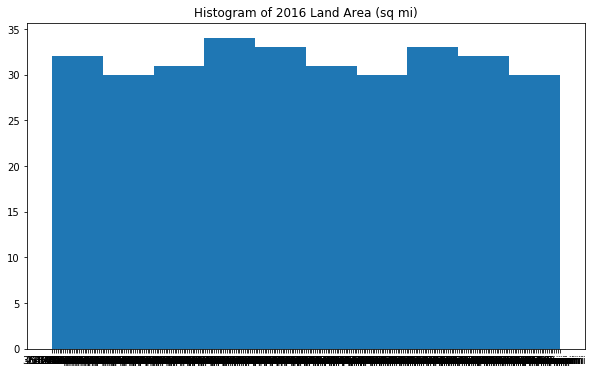

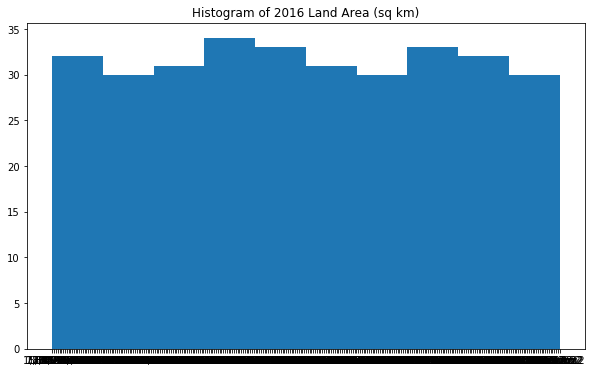

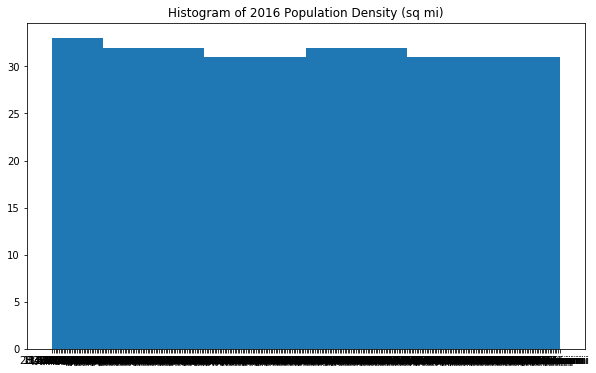

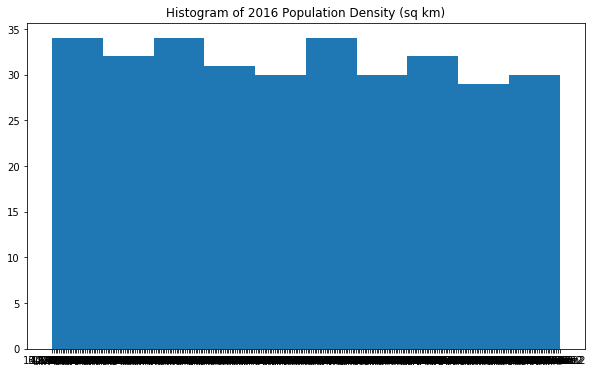

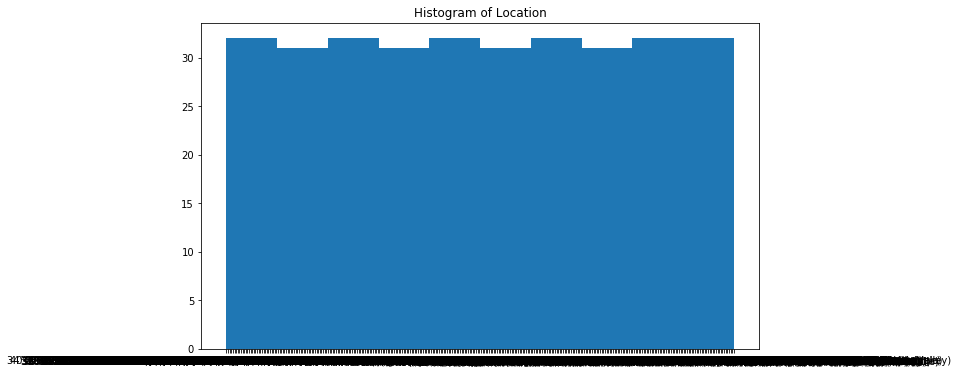

In [457]:
# Create histograms of each Month
for c in clean_df.columns:
    plt.hist(clean_df[c])
    plt.title("Histogram of " + c, fontsize = 12)
    plt.show()

#### The histograms don't really tell me much so I probably don't need them. There isn't going to be any outliers here because this is a ranked dataset.

In [458]:
# Get rid of hyperlink text that several cities had next to their names.
clean_df['City'].replace(['New York[d]'], 'New York', inplace=True)
clean_df['City'].replace(['Houston[3]'], 'Houston', inplace=True)
clean_df['City'].replace(['Philadelphia[e]'], 'Philadelphia', inplace=True)
clean_df['City'].replace(['Jacksonville[f]'], 'Jacksonville', inplace=True)
clean_df['City'].replace(['San Francisco[g]'], 'San Francisco', inplace=True)
clean_df['City'].replace(['Indianapolis[h]'], 'Indianapolis', inplace=True)
clean_df['City'].replace(['Denver[i]'], 'Denver', inplace=True)
clean_df['City'].replace(['Washington[j]'], 'Washington', inplace=True)
clean_df['City'].replace(['Nashville[k]'], 'Nashville', inplace=True)
clean_df['City'].replace(['Louisville[l]'], 'Louisville', inplace=True)
clean_df['City'].replace(['Baltimore[m]'], 'Baltimore', inplace=True)
clean_df['City'].replace(['Virginia Beach[m]'], 'Virginia Beach', inplace=True)
clean_df['City'].replace(['New Orleans[n]'], 'New Orleans', inplace=True)
clean_df['City'].replace(['Honolulu[b]'], 'Honolulu', inplace=True)
clean_df['City'].replace(['Lexington[o]'], 'Lexington', inplace=True)
clean_df['City'].replace(['St. Louis[m]'], 'St. Louis', inplace=True)
clean_df['City'].replace(['Anchorage[p]'], 'Anchorage', inplace=True)
clean_df['City'].replace(['Chesapeake[m]'], 'Chesapeake', inplace=True)
clean_df['City'].replace(['Norfolk[m]'], 'Norfolk', inplace=True)
clean_df['City'].replace(['Richmond[m]'], 'Richmond', inplace=True)
clean_df['City'].replace(['Boise[r]'], 'Boise', inplace=True)
clean_df['City'].replace(['Baton Rouge[s]'], 'Baton Rouge', inplace=True)
clean_df['City'].replace(['Augusta[t]'], 'Augusta', inplace=True)
clean_df['City'].replace(['Columbus[u]'], 'Columbus', inplace=True)
clean_df['City'].replace(['Newport News[m]'], 'Newport News', inplace=True)
clean_df['City'].replace(['Cary[v]'], 'Cary', inplace=True)
clean_df['City'].replace(['Alexandria[m]'], 'Alexandria', inplace=True)
clean_df['City'].replace(['Macon[w]'], 'Macon', inplace=True)
clean_df['City'].replace(['Kansas City[x]'], 'Kansas City', inplace=True)
clean_df['City'].replace(['Hampton[m]'], 'Hampton', inplace=True)
clean_df['City'].replace(['Athens[y]'], 'Athens', inplace=True)
clean_df['City'].replace(['Lafayette[z]'], 'Lafayette', inplace=True)
clean_df['City'].replace(['Ventura[ab]'], 'Ventura', inplace=True)
clean_df['City'].replace(['Davie[ac]'], 'Davie', inplace=True)
clean_df['City'].replace(['Lakewood[ad]'], 'Lakewood', inplace=True)
clean_df['City'].replace(['Clinton[ae]'], 'Clinton', inplace=True)
clean_df['City'].replace(['Woodbridge[ad]'], 'Woodbridge', inplace=True)
clean_df['City'].replace(['Gilbert[q]'], 'Gilbert', inplace=True)
clean_df['City'].replace(['Winston–Salem'], 'Winston Salem', inplace=True)




/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [459]:
# Final cleaned dataframe from wikitable
clean_df

Rank in 2019         City       State 2019 Estimate 2010 Census  \
1              1     New York    New York     8,336,817   8,175,133   
2              2  Los Angeles  California     3,979,576   3,792,621   
3              3      Chicago    Illinois     2,693,976   2,695,598   
4              4      Houston       Texas     2,320,268   2,100,263   
5              5      Phoenix     Arizona     1,680,992   1,445,632   
..           ...          ...         ...           ...         ...   
313          313   San Angelo       Texas       101,004      93,200   
314          314    Vacaville  California       100,670      92,428   
315          315      Clinton    Michigan       100,471      96,796   
316          316         Bend      Oregon       100,421      76,639   
317          317   Woodbridge  New Jersey       100,145      99,585   

    Percent Change 2016 Land Area (sq mi) 2016 Land Area (sq km)  \
1           +1.98%            301.5 sq mi              780.9 km2   
2           +4.93%            468.7 sq mi            1,213.9 km2   
3           −0.06%            227.3 sq mi              588.7 km2   
4          +10.48%            637.5 sq mi            1,651.1 km2   
5          +16.28%            517.6 sq mi            1,340.6 km2   
..             ...                    ...                    ...   
313         +8.37%             59.9 sq mi              155.1 km2   
314         +8.92%             29.0 sq mi               75.1 km2   
315         +3.80%             28.1 sq mi               72.8 km2   
316        +31.03%             33.1 sq mi               85.7 km2   
317         +0.56%             23.3 sq mi               60.3 km2   

    2016 Population Density (sq mi) 2016 Population Density (sq km)  \
1                      28,317/sq mi                      10,933/km2   
2                       8,484/sq mi                       3,276/km2   
3                      11,900/sq mi                       4,600/km2   
4                       3,613/sq mi                       1,395/km2   
5                       3,120/sq mi                       1,200/km2   
..                              ...                             ...   
313                     1,681/sq mi                         649/km2   
314                     3,449/sq mi                       1,332/km2   
315                     3,573/sq mi                       1,380/km2   
316                     3,034/sq mi                       1,171/km2   
317                     4,351/sq mi                       1,680/km2   

                                              Location  
1    40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...  
2    34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...  
3    41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...  
4    29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...  
5    33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...  
..                                                 ...  
313  31°26′28″N 100°27′02″W﻿ / ﻿31.4411°N 100.4505°...  
314  38°21′14″N 121°58′22″W﻿ / ﻿38.3539°N 121.9728°...  
315  42°35′25″N 82°55′01″W﻿ / ﻿42.5903°N 82.9170°W﻿...  
316  44°03′00″N 121°18′00″W﻿ / ﻿44.0500°N 121.3000°...  
317  40°33′39″N 74°17′34″W﻿ / ﻿40.5607°N 74.2927°W﻿...  

[316 rows x 11 columns]

In [460]:
# Check the states of any duplicated cities.

pd.concat(g for _, g in clean_df.groupby("City") if len(g) > 1)

Rank in 2019         City           State 2019 Estimate 2010 Census  \
54            54       Aurora        Colorado       379,289     325,078   
124          124       Aurora        Illinois       197,757     197,899   
211          211     Columbia  South Carolina       131,674     129,272   
227          227     Columbia        Missouri       123,195     108,500   
14            14     Columbus            Ohio       898,553     787,033   
128          128     Columbus         Georgia       195,769     189,885   
88            88     Glendale         Arizona       252,381     226,721   
119          119     Glendale      California       199,303     191,719   
38            38  Kansas City        Missouri       495,327     459,787   
169          169  Kansas City          Kansas       152,960     145,786   
162          162     Lakewood        Colorado       157,935     142,980   
290          290     Lakewood      New Jersey       106,300      92,843   
174          174     Pasadena           Texas       151,227     149,043   
192          192     Pasadena      California       141,029     137,122   
147          147       Peoria         Arizona       175,961     154,065   
273          273       Peoria        Illinois       110,417     115,007   
97            97     Richmond        Virginia       230,436     204,214   
272          272     Richmond      California       110,567     103,701   
111          111    Rochester        New York       205,695     210,565   
237          237    Rochester       Minnesota       118,935     106,769   
157          157  Springfield        Missouri       167,882     159,498   
167          167  Springfield   Massachusetts       153,606     153,060   
256          256  Springfield        Illinois       114,230     116,250   

    Percent Change 2016 Land Area (sq mi) 2016 Land Area (sq km)  \
54         +16.68%            153.5 sq mi              397.6 km2   
124         −0.07%             44.9 sq mi              116.3 km2   
211         +1.86%            133.5 sq mi              345.8 km2   
227        +13.54%             65.0 sq mi              168.3 km2   
14         +14.17%            218.5 sq mi              565.9 km2   
128         +3.10%            216.4 sq mi              560.5 km2   
88         +11.32%             59.1 sq mi              153.1 km2   
119         +3.96%             30.4 sq mi               78.7 km2   
38          +7.73%            315.0 sq mi              815.8 km2   
169         +4.92%            124.8 sq mi              323.2 km2   
162        +10.46%             42.9 sq mi              111.1 km2   
290        +14.49%             24.7 sq mi               64.0 km2   
174         +1.47%             43.5 sq mi              112.7 km2   
192         +2.85%             23.0 sq mi               59.6 km2   
147        +14.21%            175.7 sq mi              455.1 km2   
273         −3.99%             48.2 sq mi              124.8 km2   
97         +12.84%             59.8 sq mi              154.9 km2   
272         +6.62%             30.1 sq mi               78.0 km2   
111         −2.31%             35.8 sq mi               92.7 km2   
237        +11.39%             54.6 sq mi              141.4 km2   
157         +5.26%             82.3 sq mi              213.2 km2   
167         +0.36%             31.9 sq mi               82.6 km2   
256         −1.74%             60.1 sq mi              155.7 km2   

    2016 Population Density (sq mi) 2016 Population Density (sq km)  \
54                      2,356/sq mi                         910/km2   
124                     4,479/sq mi                       1,729/km2   
211                     1,006/sq mi                         388/km2   
227                     1,856/sq mi                         717/km2   
14                      3,936/sq mi                       1,520/km2   
128                       913/sq mi                         353/km2   
88                      4,161/sq mi                       1,607/km2   
11

# Milestone 4 - Maddie Bauer

### The 5 data transformation and/or cleaning steps I performed include:
#### 1. Replace headers 
#### 2. Checking for Missing Data 
#### 3. Dropped Columns
#### 4. Checked for Duplicates
#### 5. Format data into more readable format

In [461]:
# create list of cities from Wikitable dataframe
city_list = clean_df['City'].tolist()
city_list.remove('Winston Salem')
city_list


['New York',
 'Los Angeles',
 'Chicago',
 'Houston',
 'Phoenix',
 'Philadelphia',
 'San Antonio',
 'San Diego',
 'Dallas',
 'San Jose',
 'Austin',
 'Jacksonville',
 'Fort Worth',
 'Columbus',
 'Charlotte',
 'San Francisco',
 'Indianapolis',
 'Seattle',
 'Denver',
 'Washington',
 'Boston',
 'El Paso',
 'Nashville',
 'Detroit',
 'Oklahoma City',
 'Portland',
 'Las Vegas',
 'Memphis',
 'Louisville',
 'Baltimore',
 'Milwaukee',
 'Albuquerque',
 'Tucson',
 'Fresno',
 'Mesa',
 'Sacramento',
 'Atlanta',
 'Kansas City',
 'Colorado Springs',
 'Omaha',
 'Raleigh',
 'Miami',
 'Long Beach',
 'Virginia Beach',
 'Oakland',
 'Minneapolis',
 'Tulsa',
 'Tampa',
 'Arlington',
 'New Orleans',
 'Wichita',
 'Bakersfield',
 'Cleveland',
 'Aurora',
 'Anaheim',
 'Honolulu',
 'Santa Ana',
 'Riverside',
 'Corpus Christi',
 'Lexington',
 'Henderson',
 'Stockton',
 'Saint Paul',
 'Cincinnati',
 'St. Louis',
 'Pittsburgh',
 'Greensboro',
 'Lincoln',
 'Anchorage',
 'Plano',
 'Orlando',
 'Irvine',
 'Newark',
 'Durha

In [462]:
len(city_list)

315

In [463]:
# create list of cities from csv file dataframe
# didn't end up using this list
city_list2 = dff['City'].tolist()
city_list2

['Algiers',
 'Tamanrasset',
 'Reggane',
 'Luanda',
 'Cotonou',
 'Parakou',
 'Kandi, Benin',
 'Maun, Botswana',
 'Gaborone',
 'Ghanzi',
 'Ouagadougou',
 'Ouahigouya',
 'Bujumbura',
 'Garoua',
 'Ngaoundéré',
 'Douala',
 'Yaoundé',
 'Praia',
 'Bangui',
 'Birao',
 "N'Djamena",
 'Abéché',
 'Kinshasa',
 'Lubumbashi',
 'Djibouti (city)',
 'Cairo',
 'Alexandria',
 'Bata, Equatorial Guinea',
 'Malabo',
 'Asmara',
 'Assab',
 "Mek'ele",
 'Addis Ababa',
 'Libreville',
 'Port-Gentil',
 'Banjul',
 'Accra',
 'Tamale, Ghana',
 'Kumasi',
 'Conakry',
 'Kankan',
 'Bissau',
 'Gagnoa',
 'Bouaké',
 'Abidjan',
 'Odienné',
 'Mombasa',
 'Nairobi',
 'Garissa',
 'Lodwar',
 'Tripoli',
 'Benghazi',
 'Fianarantsoa',
 'Toamasina',
 'Antananarivo',
 'Antsiranana',
 'Mahajanga',
 'Toliara',
 'Karonga',
 'Blantyre',
 'Mzuzu',
 'Ségou',
 'Timbuktu',
 'Bamako',
 'Nouadhibou',
 'Nouakchott',
 'Rabat',
 'Marrakesh',
 'Ouarzazate',
 'Maputo',
 'Niamey',
 'Lagos',
 'Makurdi',
 'Jos',
 'Kano',
 'Sokoto',
 'Brazzaville',
 'Poi

In [464]:
len(city_list2)

424

In [465]:
import requests
import json

In [466]:
# APIKEY = 'cf52ddb92955c9ece87ab0ede253e3c8'

In [467]:
city_API_endpoint = 'http://api.openweathermap.org/data/2.5/weather?q='

In [468]:
join_key = "&appid=" + "cf52ddb92955c9ece87ab0ede253e3c8"

In [469]:
units = "&units=imperial"

In [470]:
# this code is incorporated below
# current_city_weather = city_API_endpoint + city_name + join_key + units
# print(current_city_weather)

In [471]:
# Create empty lists to store the JSON Data
prediction_num = 0
current_weather_id = []
own_city_id = []
city = []
country = []
temperature = []
temperature_feel = []
temperature_min = []
temperature_max = []
pressure = []
humidity = []
main = []
main_description = []
clouds = []
wind_speed = []
wind_degree = []




# iterate over city_list and append empty lists above
for c in city_list:
    city_name = c
    current_city_weather = city_API_endpoint + city_name + join_key + units
    print(current_city_weather)
    json_data = requests.get(current_city_weather).json()
    print(json_data)
    prediction_num +=1
    current_weather_id.append(prediction_num + 1)
    own_city_id.append(json_data['id'])
    city.append(json_data['name'])
    country.append(json_data['sys']['country'])
    temperature.append(json_data['main']['temp'])
    temperature_feel.append(json_data['main']['feels_like'])
    temperature_min.append(json_data['main']['temp_min'])
    temperature_max.append(json_data['main']['temp_max'])
    pressure.append(json_data['main']['pressure'])
    humidity.append(json_data['main']['humidity'])
    main.append(json_data['weather'][0]['main'])
    main_description.append(json_data['weather'][0]['description'])
    clouds.append(json_data['clouds']['all'])
    wind_speed.append(json_data['wind']['speed'])
    wind_degree.append(json_data['wind']['deg'])
    



http://api.openweathermap.org/data/2.5/weather?q=New York&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -74.01, 'lat': 40.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.63, 'feels_like': 89.37, 'temp_min': 86, 'temp_max': 91, 'pressure': 1017, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1596478378, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1596448504, 'sunset': 1596499753}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Los Angeles&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -118.24, 'lat': 34.05}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 80.4, 'feels_like': 80.51, 'temp_min': 69.8, 'temp_max': 87.01, 'pressure': 1014, 'humidity': 54

{'coord': {'lon': -80.84, 'lat': 35.23}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 77.43, 'temp_min': 73.4, 'temp_max': 77, 'pressure': 1017, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 130}, 'rain': {'1h': 3.81}, 'clouds': {'all': 75}, 'dt': 1596478830, 'sys': {'type': 1, 'id': 3648, 'country': 'US', 'sunrise': 1596450851, 'sunset': 1596500684}, 'timezone': -14400, 'id': 4460243, 'name': 'Charlotte', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=San Francisco&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -122.42, 'lat': 37.77}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 65.34, 'feels_like': 57.4, 'temp_min': 62.01, 'temp_max': 73, 'pressure': 1017, 'humi

{'coord': {'lon': -85.76, 'lat': 38.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 83.64, 'temp_min': 80.01, 'temp_max': 84, 'pressure': 1015, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1596478618, 'sys': {'type': 1, 'id': 5801, 'country': 'US', 'sunrise': 1596451658, 'sunset': 1596502239}, 'timezone': -14400, 'id': 4299276, 'name': 'Louisville', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Baltimore&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -76.61, 'lat': 39.29}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.86, 'feels_like': 86.88, 'temp_min': 84.2, 'temp_max': 89.01, 'pressure': 1017, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 159

{'coord': {'lon': -80.19, 'lat': 25.77}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 87.62, 'feels_like': 98.04, 'temp_min': 84, 'temp_max': 91, 'pressure': 1014, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 300}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1596478746, 'sys': {'type': 1, 'id': 4896, 'country': 'US', 'sunrise': 1596451698, 'sunset': 1596499525}, 'timezone': -14400, 'id': 4164138, 'name': 'Miami', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Long Beach&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -118.19, 'lat': 33.77}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 72.88, 'feels_like': 73.08, 'temp_min': 69.01, 'temp_max': 75.99, 'pressure': 1014, 'humidity': 73}, 'visi

{'coord': {'lon': -117.87, 'lat': 33.75}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 78.6, 'feels_like': 79.25, 'temp_min': 69.01, 'temp_max': 86, 'pressure': 1015, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1596478844, 'sys': {'type': 1, 'id': 5876, 'country': 'US', 'sunrise': 1596459915, 'sunset': 1596509394}, 'timezone': -25200, 'id': 5392900, 'name': 'Santa Ana', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Riverside&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -116.05, 'lat': 33.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 96.24, 'feels_like': 94.35, 'temp_min': 91.99, 'temp_max': 98.6, 'pressure': 1009, 'humidity': 23}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1596478844, 'sys': 

{'coord': {'lon': -117.82, 'lat': 33.67}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 79.27, 'feels_like': 80.22, 'temp_min': 69.01, 'temp_max': 86, 'pressure': 1015, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1596478826, 'sys': {'type': 1, 'id': 5876, 'country': 'US', 'sunrise': 1596459912, 'sunset': 1596509373}, 'timezone': -25200, 'id': 5359777, 'name': 'Irvine', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Newark&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -74.17, 'lat': 40.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 88.29, 'feels_like': 86.81, 'temp_min': 86, 'temp_max': 90, 'pressure': 1016, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1596478557, 'sys': {'ty

{'coord': {'lon': -111.79, 'lat': 33.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 103.46, 'feels_like': 104.14, 'temp_min': 100.99, 'temp_max': 106, 'pressure': 1014, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1596478519, 'sys': {'type': 1, 'id': 3606, 'country': 'US', 'sunrise': 1596458501, 'sunset': 1596507890}, 'timezone': -25200, 'id': 5295903, 'name': 'Gilbert', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Glendale&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -112.19, 'lat': 33.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 103.17, 'feels_like': 102.06, 'temp_min': 100.99, 'temp_max': 106, 'pressure': 1013, 'humidity': 22}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 

{'coord': {'lon': -117.29, 'lat': 34.11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.32, 'feels_like': 86.13, 'temp_min': 88, 'temp_max': 93, 'pressure': 1015, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1596478849, 'sys': {'type': 1, 'id': 5778, 'country': 'US', 'sunrise': 1596459735, 'sunset': 1596509296}, 'timezone': -25200, 'id': 5391710, 'name': 'San Bernardino', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Modesto&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -121, 'lat': 37.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.53, 'feels_like': 76.28, 'temp_min': 81, 'temp_max': 84.2, 'pressure': 1015, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 340}, 'clouds': {'all': 1}, 'dt': 1596478705, 

{'coord': {'lon': -96.82, 'lat': 33.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.92, 'feels_like': 93.78, 'temp_min': 87.01, 'temp_max': 91, 'pressure': 1012, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 338, 'gust': 8.01}, 'clouds': {'all': 9}, 'dt': 1596478588, 'sys': {'type': 3, 'id': 2003174, 'country': 'US', 'sunrise': 1596454928, 'sunset': 1596504277}, 'timezone': -18000, 'id': 4692559, 'name': 'Frisco', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Yonkers&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -73.9, 'lat': 40.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.15, 'feels_like': 88.72, 'temp_min': 86, 'temp_max': 91.99, 'pressure': 1016, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 280, 'gust': 17.22}, 'clouds': {'all': 1}, 

{'coord': {'lon': -97, 'lat': 32.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 90.77, 'feels_like': 89.49, 'temp_min': 89.01, 'temp_max': 91.99, 'pressure': 1018, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 60}, 'clouds': {'all': 5}, 'dt': 1596478851, 'sys': {'type': 1, 'id': 4249, 'country': 'US', 'sunrise': 1596455016, 'sunset': 1596504275}, 'timezone': -18000, 'id': 4694482, 'name': 'Grand Prairie', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Tallahassee&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -84.28, 'lat': 30.44}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 94.33, 'feels_like': 99.55, 'temp_min': 93, 'temp_max': 96.01, 'pressure': 1014, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 159

{'coord': {'lon': -71.41, 'lat': 41.82}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 91.49, 'feels_like': 86.63, 'temp_min': 89.6, 'temp_max': 93.99, 'pressure': 1015, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 230, 'gust': 19.46}, 'clouds': {'all': 20}, 'dt': 1596478853, 'sys': {'type': 1, 'id': 5441, 'country': 'US', 'sunrise': 1596447721, 'sunset': 1596499288}, 'timezone': -14400, 'id': 5224151, 'name': 'Providence', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Newport News&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -76.43, 'lat': 36.98}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 82.27, 'temp_min': 75.2, 'temp_max': 80.6, 'pressure': 1018, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 230}, 'rain': {'1h

{'coord': {'lon': -93.3, 'lat': 37.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 77.74, 'feels_like': 73.11, 'temp_min': 77, 'temp_max': 79, 'pressure': 1018, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1596478675, 'sys': {'type': 1, 'id': 5821, 'country': 'US', 'sunrise': 1596453600, 'sunset': 1596503916}, 'timezone': -18000, 'id': 4409896, 'name': 'Springfield', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Jackson&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -122.83, 'lat': 42.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.98, 'feels_like': 74.26, 'temp_min': 75, 'temp_max': 80.01, 'pressure': 1020, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1596478825, '

{'coord': {'lon': -117.75, 'lat': 34.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.56, 'feels_like': 84.94, 'temp_min': 84, 'temp_max': 90, 'pressure': 1015, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 5.97, 'deg': 242}, 'clouds': {'all': 1}, 'dt': 1596478774, 'sys': {'type': 1, 'id': 3578, 'country': 'US', 'sunrise': 1596459851, 'sunset': 1596509400}, 'timezone': -25200, 'id': 5384170, 'name': 'Pomona', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Killeen&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -97.73, 'lat': 31.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 94.41, 'feels_like': 93.38, 'temp_min': 93.2, 'temp_max': 95, 'pressure': 1017, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 7.61, 'deg': 49}, 'clouds': {'all': 40}, 'dt': 1596478856, 'sys'

{'coord': {'lon': -98.23, 'lat': 26.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 92.1, 'feels_like': 96.48, 'temp_min': 90, 'temp_max': 93, 'pressure': 1017, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1596478847, 'sys': {'type': 1, 'id': 4874, 'country': 'US', 'sunrise': 1596455988, 'sunset': 1596503894}, 'timezone': -18000, 'id': 4709796, 'name': 'McAllen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Syracuse&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': 15.28, 'lat': 37.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.27, 'feels_like': 88.92, 'temp_min': 82.4, 'temp_max': 87.8, 'pressure': 1006, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1596478857, 'sys'

{'coord': {'lon': -117.93, 'lat': 33.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.61, 'feels_like': 82.27, 'temp_min': 73.99, 'temp_max': 86, 'pressure': 1014, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1596478858, 'sys': {'type': 1, 'id': 4154, 'country': 'US', 'sunrise': 1596459916, 'sunset': 1596509422}, 'timezone': -25200, 'id': 5351247, 'name': 'Fullerton', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Charleston&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -79.93, 'lat': 32.78}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.5, 'feels_like': 82.11, 'temp_min': 75, 'temp_max': 78.01, 'pressure': 1013, 'humidity': 94}, 'visibility': 3219, 'wind': {'speed': 8.05, 'deg': 30}, 'rain': {'1h': 3.68}, 'clouds': {'all': 

{'coord': {'lon': -72.93, 'lat': 41.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.76, 'feels_like': 88.05, 'temp_min': 84.99, 'temp_max': 89.01, 'pressure': 1016, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1596478643, 'sys': {'type': 1, 'id': 4445, 'country': 'US', 'sunrise': 1596448160, 'sunset': 1596499579}, 'timezone': -14400, 'id': 4839366, 'name': 'New Haven', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Stamford&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -73.54, 'lat': 41.05}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.19, 'feels_like': 89.24, 'temp_min': 84.2, 'temp_max': 90, 'pressure': 1017, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1596478693, 

{'coord': {'lon': 30.73, 'lat': 46.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 65.34, 'temp_min': 68, 'temp_max': 68, 'pressure': 1015, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 160}, 'clouds': {'all': 56}, 'dt': 1596478751, 'sys': {'type': 1, 'id': 8915, 'country': 'UA', 'sunrise': 1596422444, 'sunset': 1596475541}, 'timezone': 10800, 'id': 698740, 'name': 'Odesa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Columbia&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -81.03, 'lat': 34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.58, 'feels_like': 94.12, 'temp_min': 87.01, 'temp_max': 87.8, 'pressure': 1015, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1596478701, 'sys': 

{'coord': {'lon': -95.63, 'lat': 29.62}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 92.23, 'feels_like': 97.92, 'temp_min': 91, 'temp_max': 93.99, 'pressure': 1016, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1596478853, 'sys': {'type': 1, 'id': 5828, 'country': 'US', 'sunrise': 1596455023, 'sunset': 1596503611}, 'timezone': -18000, 'id': 4734825, 'name': 'Sugar Land', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Lansing&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -84.56, 'lat': 42.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 74.91, 'feels_like': 75, 'temp_min': 73, 'temp_max': 77, 'pressure': 1015, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1596478819, 

{'coord': {'lon': -117.35, 'lat': 33.16}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 73.74, 'feels_like': 75.97, 'temp_min': 69.01, 'temp_max': 80.01, 'pressure': 1015, 'humidity': 83}, 'visibility': 9656, 'wind': {'speed': 8.05, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1596478864, 'sys': {'type': 1, 'id': 5191, 'country': 'US', 'sunrise': 1596459857, 'sunset': 1596509202}, 'timezone': -25200, 'id': 5334223, 'name': 'Carlsbad', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Temecula&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -117.15, 'lat': 33.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.77, 'feels_like': 82.62, 'temp_min': 80.6, 'temp_max': 93, 'pressure': 1015, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1596478864, 'sys': {'

{'coord': {'lon': 36.16, 'lat': 36.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 80.67, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1004, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 260}, 'clouds': {'all': 4}, 'dt': 1596478866, 'sys': {'type': 1, 'id': 7008, 'country': 'TR', 'sunrise': 1596422637, 'sunset': 1596472741}, 'timezone': 10800, 'id': 323779, 'name': 'Antakya', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Everett&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -122.2, 'lat': 47.98}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.61, 'feels_like': 68.56, 'temp_min': 68, 'temp_max': 73.99, 'pressure': 1022, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 150}, 'clouds': {'all': 90}, 'dt': 1596478851, 'sy

{'coord': {'lon': -96.99, 'lat': 33.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.26, 'feels_like': 91.31, 'temp_min': 87.01, 'temp_max': 91, 'pressure': 1018, 'humidity': 40}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 70}, 'clouds': {'all': 5}, 'dt': 1596478839, 'sys': {'type': 1, 'id': 3226, 'country': 'US', 'sunrise': 1596454981, 'sunset': 1596504306}, 'timezone': -18000, 'id': 4706057, 'name': 'Lewisville', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Hillsboro&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -122.99, 'lat': 45.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.84, 'feels_like': 72.9, 'temp_min': 71.01, 'temp_max': 75, 'pressure': 1022, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 1}, 'dt': 1596478764, 'sys': 

{'coord': {'lon': -117.94, 'lat': 34.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.34, 'feels_like': 87.4, 'temp_min': 82, 'temp_max': 87.01, 'pressure': 1014, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1596478869, 'sys': {'type': 1, 'id': 3971, 'country': 'US', 'sunrise': 1596459895, 'sunset': 1596509447}, 'timezone': -25200, 'id': 5407933, 'name': 'West Covina', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Sparks&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -119.75, 'lat': 39.53}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 79.75, 'feels_like': 75.18, 'temp_min': 75.99, 'temp_max': 82, 'pressure': 1023, 'humidity': 19}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 65}, 'clouds': {'all': 1}, 'dt': 1596478819, 'sys': {'t

{'coord': {'lon': -90.58, 'lat': 41.52}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.94, 'feels_like': 65.16, 'temp_min': 66.99, 'temp_max': 70, 'pressure': 1019, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1596478870, 'sys': {'type': 1, 'id': 4924, 'country': 'US', 'sunrise': 1596452369, 'sunset': 1596503842}, 'timezone': -18000, 'id': 4853423, 'name': 'Davenport', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Edinburg&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -3.2, 'lat': 55.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.78, 'feels_like': 51.26, 'temp_min': 55.99, 'temp_max': 60.01, 'pressure': 1014, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 15

In [472]:
# create an empty dataframe
df_all_current_weather = pd.DataFrame()

In [473]:
# Write Lists to the empty dataframe 
df_all_current_weather['current_weather_id'] = current_weather_id
df_all_current_weather['own_city_id'] = own_city_id
df_all_current_weather['city'] = city
df_all_current_weather['country'] = country
df_all_current_weather['temperature'] = temperature
df_all_current_weather['temperature_feel'] = temperature_feel
df_all_current_weather['temperature_min'] = temperature_min
df_all_current_weather['temperature_max'] = temperature_max
df_all_current_weather['pressure'] = pressure
df_all_current_weather['humidity'] = humidity
df_all_current_weather['main'] = main
df_all_current_weather['main_description'] = main_description
df_all_current_weather['clouds'] = clouds
df_all_current_weather['wind_speed'] = wind_speed
df_all_current_weather['wind_degree'] = wind_degree


In [474]:
# view dataframe 
df_all_current_weather

current_weather_id  own_city_id                         city country  \
0                     2      5128581                     New York      US   
1                     3      5368361                  Los Angeles      US   
2                     4      4887398                      Chicago      US   
3                     5      4699066                      Houston      US   
4                     6      5308655                      Phoenix      US   
..                  ...          ...                          ...     ...   
310                 312      5530022                   San Angelo      US   
311                 313      5405228                    Vacaville      US   
312                 314      4989133  Charter Township of Clinton      US   
313                 315      5713587                         Bend      US   
314                 316      5106529                   Woodbridge      US   

     temperature  temperature_feel  temperature_min  temperature_max  \
0          88.63             89.37            86.00            91.00   
1          80.40             80.51            69.80            87.01   
2          69.15             66.04            68.00            70.00   
3          91.62             96.46            89.60            93.00   
4         103.51            104.22           100.99           106.00   
..           ...               ...              ...              ...   
310        78.80             77.77            78.80            78.80   
311        89.62             89.82            86.00            93.99   
312        80.19             84.07            78.80            82.99   
313        71.89             67.84            69.01            75.20   
314        88.39             90.73            86.00            90.00   

     pressure  humidity    main main_description  clouds  wind_speed  \
0        1017        48   Clear        clear sky       1        9.17   
1        1014        54    Haze             haze       1        7.14   
2        1017        73  Clouds    broken clouds      75       11.41   
3        1016        49    Rain       light rain      20        4.70   
4        1013        26   Smoke            smoke      75        5.82   
..        ...       ...     ...              ...     ...         ...   
310      1020        57  Clouds  overcast clouds      90        9.17   
311      1016        33   Clear        clear sky       1        3.36   
312      1013        69    Rain       light rain      75        5.82   
313      1023        33   Clear        clear sky       1        3.67   
314      1017        45   Clear        clear sky       1        4.70   

     wind_degree  
0            240  
1            232  
2            360  
3              0  
4              0  
..           ...  
310           70  
311            0  
312          270  
313           27  
314          260  

[315 rows x 15 columns]

In [475]:
df_all_current_weather.columns

Index(['current_weather_id', 'own_city_id', 'city', 'country', 'temperature',
       'temperature_feel', 'temperature_min', 'temperature_max', 'pressure',
       'humidity', 'main', 'main_description', 'clouds', 'wind_speed',
       'wind_degree'],
      dtype='object')

In [476]:
# I have decided I do not need the current_weather_id and own_city_id columns
del df_all_current_weather['current_weather_id']

In [477]:
del df_all_current_weather['own_city_id']

In [478]:
df_all_current_weather

city country  temperature  temperature_feel  \
0                       New York      US        88.63             89.37   
1                    Los Angeles      US        80.40             80.51   
2                        Chicago      US        69.15             66.04   
3                        Houston      US        91.62             96.46   
4                        Phoenix      US       103.51            104.22   
..                           ...     ...          ...               ...   
310                   San Angelo      US        78.80             77.77   
311                    Vacaville      US        89.62             89.82   
312  Charter Township of Clinton      US        80.19             84.07   
313                         Bend      US        71.89             67.84   
314                   Woodbridge      US        88.39             90.73   

     temperature_min  temperature_max  pressure  humidity    main  \
0              86.00            91.00      1017        48   Clear   
1              69.80            87.01      1014        54    Haze   
2              68.00            70.00      1017        73  Clouds   
3              89.60            93.00      1016        49    Rain   
4             100.99           106.00      1013        26   Smoke   
..               ...              ...       ...       ...     ...   
310            78.80            78.80      1020        57  Clouds   
311            86.00            93.99      1016        33   Clear   
312            78.80            82.99      1013        69    Rain   
313            69.01            75.20      1023        33   Clear   
314            86.00            90.00      1017        45   Clear   

    main_description  clouds  wind_speed  wind_degree  
0          clear sky       1        9.17          240  
1               haze       1        7.14          232  
2      broken clouds      75       11.41          360  
3         light rain      20        4.70            0  
4              smoke      75        5.82            0  
..               ...     ...         ...          ...  
310  overcast clouds      90        9.17           70  
311        clear sky       1        3.36            0  
312       light rain      75        5.82          270  
313        clear sky       1        3.67           27  
314        clear sky       1        4.70          260  

[315 rows x 13 columns]

In [479]:
# rename columns
df_all_current_weather = df_all_current_weather.rename(columns={'city': 'City', 'country': 'Country', 'temperature': 'Current Temp', 'temperature_feel': 'Feels Like Temp', 
                            'temperature_min': 'Min Temp', 
                             'temperature_max': 'Max Temp', 
                             'pressure': 'Pressure', 
                            'humidity': 'Humidity',
                             'main': 'Main', 
                             'main_description': 'Main Description',
                             'clouds': 'Clouds', 
                             'wind_speed': 'Wind Speed', 'wind_degree': 'Wind Degree'})

In [480]:
df_all_current_weather.head()

City Country  Current Temp  Feels Like Temp  Min Temp  Max Temp  \
0     New York      US         88.63            89.37     86.00     91.00   
1  Los Angeles      US         80.40            80.51     69.80     87.01   
2      Chicago      US         69.15            66.04     68.00     70.00   
3      Houston      US         91.62            96.46     89.60     93.00   
4      Phoenix      US        103.51           104.22    100.99    106.00   

   Pressure  Humidity    Main Main Description  Clouds  Wind Speed  \
0      1017        48   Clear        clear sky       1        9.17   
1      1014        54    Haze             haze       1        7.14   
2      1017        73  Clouds    broken clouds      75       11.41   
3      1016        49    Rain       light rain      20        4.70   
4      1013        26   Smoke            smoke      75        5.82   

   Wind Degree  
0          240  
1          232  
2          360  
3            0  
4            0

In [481]:
# Check for missing data
for c in df_all_current_weather.columns:
    miss = df_all_current_weather[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing value(s)".format(c, miss))
    else:
        print("{} has NO missing values.".format(c))

City has NO missing values.
Country has NO missing values.
Current Temp has NO missing values.
Feels Like Temp has NO missing values.
Min Temp has NO missing values.
Max Temp has NO missing values.
Pressure has NO missing values.
Humidity has NO missing values.
Main has NO missing values.
Main Description has NO missing values.
Clouds has NO missing values.
Wind Speed has NO missing values.
Wind Degree has NO missing values.


In [482]:
any(df_all_current_weather.City.duplicated())

True

In [483]:
df_all_current_weather['City'].nunique()

303

In [484]:
# Check for duplicated cities
pd.concat(g for _, g in df_all_current_weather.groupby("City") if len(g) > 1)


City Country  Current Temp  Feels Like Temp  Min Temp  Max Temp  \
53        Aurora      US         78.76            77.67     75.99     81.00   
122       Aurora      US         78.76            77.67     75.99     81.00   
209     Columbia      US         87.58            94.12     87.01     87.80   
225     Columbia      US         87.58            94.12     87.01     87.80   
13      Columbus      US         74.95            73.90     69.80     79.00   
126     Columbus      US         74.95            73.90     69.80     79.00   
87      Glendale      US        103.17           102.06    100.99    106.00   
117     Glendale      US        103.17           102.06    100.99    106.00   
37   Kansas City      US         73.85            69.80     73.00     75.00   
167  Kansas City      US         73.85            69.80     73.00     75.00   
160     Lakewood      US         78.51            80.60     75.00     82.00   
287     Lakewood      US         78.51            80.60     75.00     82.00   
172     Pasadena      US         91.69            95.67     89.60     93.99   
190     Pasadena      US         91.69            95.67     89.60     93.99   
145       Peoria      US         67.60            65.08     66.99     68.00   
270       Peoria      US         67.60            65.08     66.99     68.00   
95      Richmond      US         84.79            84.06     75.20     89.01   
269     Richmond      US         84.79            84.06     75.20     89.01   
109    Rochester      US         77.68            78.21     75.00     80.01   
235    Rochester      US         77.68            78.21     75.00     80.01   
155  Springfield      US         77.74            73.11     77.00     79.00   
165  Springfield      US         77.74            73.11     77.00     79.00   
253  Springfield      US         77.74            73.11     77.00     79.00   

     Pressure  Humidity          Main  Main Description  Clouds  Wind Speed  \
53       1022        44        Clouds  scattered clouds      40        4.70   
122      1022        44        Clouds  scattered clouds      40        4.70   
209      1015        62        Clouds  scattered clouds      40        4.70   
225      1015        62        Clouds  scattered clouds      40        4.70   
13       1016        61  Thunderstorm      thunderstorm      90        8.05   
126      1016        61  Thunderstorm      thunderstorm      90        8.05   
87       1013        22        Clouds     broken clouds      75        5.82   
117      1013        22        Clouds     broken clouds      75        5.82   
37       1020        53        Clouds  scattered clouds      40       10.29   
167      1020        53        Clouds  scattered clouds      40       10.29   
160      1022        50        Clouds        few clouds      19        1.01   
287      1022        50        Clouds        few clouds      19        1.01   
172      1016        46        Clouds  scattered clouds      40        4.70   
190      1016        46        Clouds  scattered clouds      40        4.70   
145      1018        72        Clouds   overcast clouds      90        9.17   
270      1018        72        Clouds   overcast clouds      90        9.17   
95       1019        94          Rain        light rain      90       28.86   
269      1019        94          Rain        light rain      90       28.86   
109      1016        54        Clouds     broken clouds      75        4.70   
235      1016        54        Clouds     broken clouds      75        4.70   
155      1018        54        Clouds  scattered clouds      40       13.87   
165      1018        54        Clouds  scattered clouds      40       13.87   
253      1018        54        Clouds  scattered clouds      40       13.87   

     Wind Degree  
53           360  
122          360  
209           80  
225           80  
13           180  
126          180  
87           120  
117          120  
37           340  
167          340  
160      

In [485]:
# Now i have to either drop the duplicated cities 
# or figure out a way to get a states column to differentiate between them

In [486]:
state_list = clean_df['State'].tolist()
# Drop Winston-Salem, NC
# state_list.remove('North Carolina')
len(state_list)


316

In [487]:
state_list

['New York',
 'California',
 'Illinois',
 'Texas',
 'Arizona',
 'Pennsylvania',
 'Texas',
 'California',
 'Texas',
 'California',
 'Texas',
 'Florida',
 'Texas',
 'Ohio',
 'North Carolina',
 'California',
 'Indiana',
 'Washington',
 'Colorado',
 'District of Columbia',
 'Massachusetts',
 'Texas',
 'Tennessee',
 'Michigan',
 'Oklahoma',
 'Oregon',
 'Nevada',
 'Tennessee',
 'Kentucky',
 'Maryland',
 'Wisconsin',
 'New Mexico',
 'Arizona',
 'California',
 'Arizona',
 'California',
 'Georgia',
 'Missouri',
 'Colorado',
 'Nebraska',
 'North Carolina',
 'Florida',
 'California',
 'Virginia',
 'California',
 'Minnesota',
 'Oklahoma',
 'Florida',
 'Texas',
 'Louisiana',
 'Kansas',
 'California',
 'Ohio',
 'Colorado',
 'California',
 'Hawaii',
 'California',
 'California',
 'Texas',
 'Kentucky',
 'Nevada',
 'California',
 'Minnesota',
 'Ohio',
 'Missouri',
 'Pennsylvania',
 'North Carolina',
 'Nebraska',
 'Alaska',
 'Texas',
 'Florida',
 'California',
 'New Jersey',
 'North Carolina',
 'Califor

In [488]:
# this is where Winston-Salem, NC was
print(state_list[89])

North Carolina


In [489]:
state_list.remove(state_list[89])

In [490]:
len(state_list)

315

In [491]:
# create dictionary with city, state
city_state = dict(zip(city_list, state_list))

In [492]:
city_state

{'New York': 'New York',
 'Los Angeles': 'California',
 'Chicago': 'Illinois',
 'Houston': 'Texas',
 'Phoenix': 'Arizona',
 'Philadelphia': 'Pennsylvania',
 'San Antonio': 'Texas',
 'San Diego': 'California',
 'Dallas': 'Texas',
 'San Jose': 'California',
 'Austin': 'Texas',
 'Jacksonville': 'Florida',
 'Fort Worth': 'Texas',
 'Columbus': 'Georgia',
 'Charlotte': 'California',
 'San Francisco': 'Indiana',
 'Indianapolis': 'Washington',
 'Seattle': 'Colorado',
 'Denver': 'District of Columbia',
 'Washington': 'Massachusetts',
 'Boston': 'Texas',
 'El Paso': 'Tennessee',
 'Nashville': 'Michigan',
 'Detroit': 'Oklahoma',
 'Oklahoma City': 'Oregon',
 'Portland': 'Nevada',
 'Las Vegas': 'Tennessee',
 'Memphis': 'Kentucky',
 'Louisville': 'Maryland',
 'Baltimore': 'Wisconsin',
 'Milwaukee': 'New Mexico',
 'Albuquerque': 'Arizona',
 'Tucson': 'California',
 'Fresno': 'Arizona',
 'Mesa': 'California',
 'Sacramento': 'Georgia',
 'Atlanta': 'Missouri',
 'Kansas City': 'Kansas',
 'Colorado Spring

In [493]:
# Create empty lists to store the JSON Data again
prediction_num = 0
current_weather_id = []
own_city_id = []
city = []
state = []
country = []
temperature = []
temperature_feel = []
temperature_min = []
temperature_max = []
pressure = []
humidity = []
main = []
main_description = []
clouds = []
wind_speed = []
wind_degree = []




# iterate through the dictionary city_state & append empty lists above
for c, s in city_state.items():
    city_name = c
    state_name = s
    current_city_weather = city_API_endpoint + city_name + "," + state_name + join_key + units
    print(current_city_weather)
    json_data = requests.get(current_city_weather).json()
    print(json_data)
    prediction_num +=1
    current_weather_id.append(prediction_num + 1)
    own_city_id.append(json_data['id'])
    city.append(json_data['name'])
    state.append(s)
    country.append(json_data['sys']['country'])
    temperature.append(json_data['main']['temp'])
    temperature_feel.append(json_data['main']['feels_like'])
    temperature_min.append(json_data['main']['temp_min'])
    temperature_max.append(json_data['main']['temp_max'])
    pressure.append(json_data['main']['pressure'])
    humidity.append(json_data['main']['humidity'])
    main.append(json_data['weather'][0]['main'])
    main_description.append(json_data['weather'][0]['description'])
    clouds.append(json_data['clouds']['all'])
    wind_speed.append(json_data['wind']['speed'])
    wind_degree.append(json_data['wind']['deg'])
    




http://api.openweathermap.org/data/2.5/weather?q=New York,New York&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -74.01, 'lat': 40.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.88, 'feels_like': 89.73, 'temp_min': 87.01, 'temp_max': 91, 'pressure': 1017, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1596478768, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1596448504, 'sunset': 1596499753}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Los Angeles,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -118.24, 'lat': 34.05}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 80.58, 'feels_like': 80.76, 'temp_min': 69.8, 'temp_max': 87.01, 'pressur

{'coord': {'lon': -83, 'lat': 39.96}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}, {'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 74.95, 'feels_like': 73.9, 'temp_min': 69.8, 'temp_max': 79, 'pressure': 1016, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1596478796, 'sys': {'type': 1, 'id': 3656, 'country': 'US', 'sunrise': 1596450767, 'sunset': 1596501805}, 'timezone': -14400, 'id': 4509177, 'name': 'Columbus', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Charlotte,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -80.84, 'lat': 35.23}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 77.4

{'coord': {'lon': -115.14, 'lat': 36.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 96.22, 'feels_like': 88.52, 'temp_min': 91.4, 'temp_max': 100.99, 'pressure': 1014, 'humidity': 8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 90}, 'clouds': {'all': 1}, 'dt': 1596478648, 'sys': {'type': 1, 'id': 6171, 'country': 'US', 'sunrise': 1596458975, 'sunset': 1596509024}, 'timezone': -25200, 'id': 5506956, 'name': 'Las Vegas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Memphis,Kentucky&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -90.05, 'lat': 35.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.56, 'feels_like': 90.16, 'temp_min': 87.01, 'temp_max': 89.6, 'pressure': 1015, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 260}, 'clouds': {'all': 40}, 'dt

{'coord': {'lon': -95.94, 'lat': 41.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.15, 'feels_like': 69.01, 'temp_min': 71.6, 'temp_max': 73.99, 'pressure': 1022, 'humidity': 46}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 40, 'gust': 16.11}, 'clouds': {'all': 1}, 'dt': 1596478662, 'sys': {'type': 1, 'id': 3571, 'country': 'US', 'sunrise': 1596453693, 'sunset': 1596505090}, 'timezone': -18000, 'id': 5074472, 'name': 'Omaha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Raleigh,Florida&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -78.64, 'lat': 35.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.11, 'feels_like': 90.16, 'temp_min': 80.6, 'temp_max': 82.99, 'pressure': 1018, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.62, 'deg': 141}, 'clouds': {'all': 

{'coord': {'lon': -117.91, 'lat': 33.84}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.56, 'feels_like': 80.85, 'temp_min': 71.01, 'temp_max': 84.99, 'pressure': 1014, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1596478737, 'sys': {'type': 1, 'id': 4154, 'country': 'US', 'sunrise': 1596459914, 'sunset': 1596509414}, 'timezone': -25200, 'id': 5323810, 'name': 'Anaheim', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Honolulu,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -157.86, 'lat': 21.31}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.02, 'feels_like': 77.49, 'temp_min': 73, 'temp_max': 78.8, 'pressure': 1017, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 80}, 'clouds': {'all': 75}, 'dt

{'coord': {'lon': -96.7, 'lat': 33.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.77, 'feels_like': 90.64, 'temp_min': 86, 'temp_max': 91, 'pressure': 1018, 'humidity': 40}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 70}, 'clouds': {'all': 5}, 'dt': 1596478833, 'sys': {'type': 1, 'id': 3226, 'country': 'US', 'sunrise': 1596454914, 'sunset': 1596504233}, 'timezone': -18000, 'id': 4719457, 'name': 'Plano', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Orlando,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -81.38, 'lat': 28.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 91.11, 'feels_like': 94.14, 'temp_min': 89.01, 'temp_max': 93, 'pressure': 1013, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1596478601, 'sy

{'coord': {'lon': -101.83, 'lat': 33.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 82.15, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1022, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1596478883, 'sys': {'type': 1, 'id': 4670, 'country': 'US', 'sunrise': 1596456081, 'sunset': 1596505529}, 'timezone': -18000, 'id': 5525584, 'name': 'Lubbock', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Scottsdale,Nevada&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -111.9, 'lat': 33.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 102.58, 'feels_like': 104.36, 'temp_min': 100, 'temp_max': 105.01, 'pressure': 1014, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 203}, 'clouds': {'all': 1}, 'dt': 15964

{'coord': {'lon': -116.2, 'lat': 43.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.07, 'feels_like': 73.83, 'temp_min': 81, 'temp_max': 84, 'pressure': 1018, 'humidity': 28}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1596478869, 'sys': {'type': 1, 'id': 3479, 'country': 'US', 'sunrise': 1596458209, 'sunset': 1596510298}, 'timezone': -21600, 'id': 5586437, 'name': 'Boise', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Spokane,Washington&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -117.37, 'lat': 47.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.62, 'feels_like': 70.38, 'temp_min': 75, 'temp_max': 78.01, 'pressure': 1019, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 210, 'gust': 19.46}, 'clouds': {'all': 1}, 'dt'

{'coord': {'lon': -77.62, 'lat': 43.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.76, 'feels_like': 78.3, 'temp_min': 75, 'temp_max': 80.01, 'pressure': 1016, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1596478709, 'sys': {'type': 1, 'id': 5698, 'country': 'US', 'sunrise': 1596449014, 'sunset': 1596500976}, 'timezone': -14400, 'id': 5134086, 'name': 'Rochester', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Port St. Lucie,Florida&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -80.35, 'lat': 27.29}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 91.74, 'feels_like': 95.92, 'temp_min': 90, 'temp_max': 95, 'pressure': 1014, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 240}, 'clouds': {'all': 40}, 

{'coord': {'lon': -92.29, 'lat': 34.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.48, 'feels_like': 91.45, 'temp_min': 82.4, 'temp_max': 87.01, 'pressure': 1016, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1596478622, 'sys': {'type': 1, 'id': 4717, 'country': 'US', 'sunrise': 1596453657, 'sunset': 1596503374}, 'timezone': -18000, 'id': 4119403, 'name': 'Little Rock', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Tempe,Arizona&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -111.91, 'lat': 33.41}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 103.59, 'feels_like': 104.32, 'temp_min': 100.99, 'temp_max': 106, 'pressure': 1013, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 159

{'coord': {'lon': -97.5, 'lat': 25.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.27, 'feels_like': 93.7, 'temp_min': 87.8, 'temp_max': 91.4, 'pressure': 1016, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1596478889, 'sys': {'type': 1, 'id': 3496, 'country': 'US', 'sunrise': 1596455842, 'sunset': 1596503690}, 'timezone': -18000, 'id': 4676740, 'name': 'Brownsville', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Fort Lauderdale,Florida&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -80.14, 'lat': 26.12}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}, {'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 82.98, 'feels_like': 89.53, 'temp_min': 78.8, 'temp_max': 89.01, 'pressure': 1014, 'humid

{'coord': {'lon': -117.57, 'lat': 33.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.24, 'feels_like': 91.17, 'temp_min': 81, 'temp_max': 93, 'pressure': 1015, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 262}, 'clouds': {'all': 1}, 'dt': 1596478702, 'sys': {'type': 1, 'id': 3262, 'country': 'US', 'sunrise': 1596459828, 'sunset': 1596509337}, 'timezone': -25200, 'id': 5339631, 'name': 'Corona', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Springfield,Illinois&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -93.3, 'lat': 37.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 77.74, 'feels_like': 73.11, 'temp_min': 77, 'temp_max': 79, 'pressure': 1018, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 159647

{'coord': {'lon': -117.75, 'lat': 34.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.56, 'feels_like': 84.94, 'temp_min': 84, 'temp_max': 90, 'pressure': 1015, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 5.97, 'deg': 242}, 'clouds': {'all': 1}, 'dt': 1596478715, 'sys': {'type': 1, 'id': 3578, 'country': 'US', 'sunrise': 1596459851, 'sunset': 1596509400}, 'timezone': -25200, 'id': 5384170, 'name': 'Pomona', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Killeen,Texas&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -97.73, 'lat': 31.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 93.9, 'feels_like': 92.71, 'temp_min': 93.2, 'temp_max': 95, 'pressure': 1017, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 7.61, 'deg': 49}, 'clouds': {'all': 40}, 'dt': 1596478638, 

{'coord': {'lon': -98.23, 'lat': 26.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 92.1, 'feels_like': 96.48, 'temp_min': 90, 'temp_max': 93, 'pressure': 1017, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1596478847, 'sys': {'type': 1, 'id': 4874, 'country': 'US', 'sunrise': 1596455988, 'sunset': 1596503894}, 'timezone': -18000, 'id': 4709796, 'name': 'McAllen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Syracuse,New York&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': 15.28, 'lat': 37.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.27, 'feels_like': 88.92, 'temp_min': 82.4, 'temp_max': 87.8, 'pressure': 1006, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 15964788

{'coord': {'lon': -112, 'lat': 40.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 92.48, 'feels_like': 81.14, 'temp_min': 89.01, 'temp_max': 95, 'pressure': 1018, 'humidity': 14}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 130, 'gust': 19.46}, 'clouds': {'all': 1}, 'dt': 1596478843, 'sys': {'type': 1, 'id': 6116, 'country': 'US', 'sunrise': 1596457631, 'sunset': 1596508860}, 'timezone': -21600, 'id': 5784607, 'name': 'West Valley City', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Visalia,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -119.29, 'lat': 36.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.35, 'feels_like': 89.46, 'temp_min': 82.4, 'temp_max': 91.99, 'pressure': 1016, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 180}, 'clouds': {'

{'coord': {'lon': -74.21, 'lat': 40.66}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 88.95, 'feels_like': 87.73, 'temp_min': 87.01, 'temp_max': 91, 'pressure': 1016, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1596478948, 'sys': {'type': 1, 'id': 4026, 'country': 'US', 'sunrise': 1596448559, 'sunset': 1596499794}, 'timezone': -14400, 'id': 5097598, 'name': 'Elizabeth', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Athens,Georgia&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': 23.72, 'lat': 37.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.3, 'feels_like': 79.11, 'temp_min': 80.01, 'temp_max': 86, 'pressure': 1008, 'humidity': 30}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1596478972

{'coord': {'lon': -75.49, 'lat': 40.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.62, 'feels_like': 83.32, 'temp_min': 82, 'temp_max': 84, 'pressure': 1018, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 1596478800, 'sys': {'type': 1, 'id': 6284, 'country': 'US', 'sunrise': 1596448874, 'sunset': 1596500094}, 'timezone': -14400, 'id': 5178127, 'name': 'Allentown', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Berkeley,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -122.27, 'lat': 37.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.32, 'feels_like': 71.47, 'temp_min': 62.01, 'temp_max': 84.99, 'pressure': 1017, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 159

{'coord': {'lon': -94.42, 'lat': 39.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.47, 'feels_like': 68.68, 'temp_min': 72, 'temp_max': 75, 'pressure': 1020, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1596478975, 'sys': {'type': 1, 'id': 4794, 'country': 'US', 'sunrise': 1596453627, 'sunset': 1596504426}, 'timezone': -18000, 'id': 4391812, 'name': 'Independence', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Provo,Utah&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -111.66, 'lat': 40.23}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 92.32, 'feels_like': 84.6, 'temp_min': 88, 'temp_max': 96.01, 'pressure': 1019, 'humidity': 9}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 159

{'coord': {'lon': -104.61, 'lat': 38.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.39, 'feels_like': 74.41, 'temp_min': 69.01, 'temp_max': 77, 'pressure': 1023, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1596478976, 'sys': {'type': 1, 'id': 5427, 'country': 'US', 'sunrise': 1596456185, 'sunset': 1596506760}, 'timezone': -21600, 'id': 5435464, 'name': 'Pueblo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Lakeland,Florida&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -81.95, 'lat': 28.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 90.54, 'feels_like': 97.16, 'temp_min': 88, 'temp_max': 93, 'pressure': 1014, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 15

{'coord': {'lon': -122.43, 'lat': 45.5}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 74.1, 'feels_like': 72.61, 'temp_min': 71.01, 'temp_max': 77, 'pressure': 1022, 'humidity': 49}, 'visibility': 6437, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1596478978, 'sys': {'type': 1, 'id': 6070, 'country': 'US', 'sunrise': 1596459401, 'sunset': 1596512097}, 'timezone': -25200, 'id': 5729485, 'name': 'Gresham', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Lewisville,Texas&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -96.99, 'lat': 33.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.26, 'feels_like': 91.31, 'temp_min': 87.01, 'temp_max': 91, 'pressure': 1018, 'humidity': 40}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 70}, 'clouds': {'all': 5}, 'dt': 1596478839, 'sys': {'t

{'coord': {'lon': -85.01, 'lat': 41.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.42, 'feels_like': 79.47, 'temp_min': 78.01, 'temp_max': 79, 'pressure': 1015, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1596478980, 'sys': {'type': 1, 'id': 4161, 'country': 'US', 'sunrise': 1596451095, 'sunset': 1596502442}, 'timezone': -14400, 'id': 4917555, 'name': 'Allen', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=West Covina,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -117.94, 'lat': 34.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.98, 'feels_like': 86.9, 'temp_min': 81, 'temp_max': 87.01, 'pressure': 1014, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 15

{'coord': {'lon': -122.22, 'lat': 47.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.78, 'feels_like': 70.12, 'temp_min': 68, 'temp_max': 72, 'pressure': 1022, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1596478981, 'sys': {'type': 1, 'id': 5692, 'country': 'US', 'sunrise': 1596459005, 'sunset': 1596512392}, 'timezone': -25200, 'id': 5808189, 'name': 'Renton', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?q=Vista,California&appid=cf52ddb92955c9ece87ab0ede253e3c8&units=imperial
{'coord': {'lon': -117.24, 'lat': 33.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.43, 'feels_like': 77.41, 'temp_min': 69.01, 'temp_max': 87.01, 'pressure': 1015, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 260}, 'clouds': {'all': 1}, 'dt': 159647

In [ ]:
# create empty dataframe again
weather = pd.DataFrame()

In [495]:
# Write Lists to the empty dataframe 
weather['City'] = city
weather['State'] = state
weather['Country'] = country
weather['Temperature'] = temperature
weather['Feels Like Temp'] = temperature_feel
weather['Min Temp'] = temperature_min
weather['Max Temp'] = temperature_max
weather['Pressure'] = pressure
weather['Humidity'] = humidity
weather['Main'] = main
weather['Main Description'] = main_description
weather['Clouds'] = clouds
weather['Wind Speed'] = wind_speed
weather['Wind Degree'] = wind_degree

In [496]:
# view the dataframe
weather.head(10)


City         State Country  Temperature  Feels Like Temp  Min Temp  \
0      New York      New York      US        88.88            89.73     87.01   
1   Los Angeles    California      US        80.58            80.76     69.80   
2       Chicago      Illinois      US        69.58            66.63     68.00   
3       Houston         Texas      US        91.85            96.80     89.60   
4       Phoenix       Arizona      US       103.51           104.22    100.99   
5  Philadelphia  Pennsylvania      US        89.74            88.90     86.00   
6   San Antonio         Texas      US        93.67            98.19     91.99   
7     San Diego    California      US        71.74            72.12     66.20   
8        Dallas         Texas      US        89.51            88.38     88.00   
9      San Jose    California      US        80.92            79.21     77.00   

   Max Temp  Pressure  Humidity    Main  Main Description  Clouds  Wind Speed  \
0     91.00      1017        48   Clear         clear sky       1        9.17   
1     87.01      1014        54    Haze              haze       1        7.14   
2     71.01      1017        73  Clouds     broken clouds      75       11.41   
3     93.99      1016        49    Rain        light rain      20        4.70   
4    106.00      1013        26   Smoke             smoke      75        5.82   
5     91.99      1017        43  Clouds  scattered clouds      40       10.29   
6     96.01      1016        41   Clear         clear sky       1        2.44   
7     75.20      1016        77  Clouds     broken clouds      75        8.05   
8     91.00      1017        40  Clouds     broken clouds      75        9.17   
9     84.00      1017        39   Smoke             smoke      75        5.01   

   Wind Degree  
0          240  
1          232  
2          360  
3            0  
4            0  
5          250  
6           58  
7          210  
8           60  
9          305

In [497]:
# duplicates? 
any(df_all_current_weather.City.duplicated())

True

In [498]:
# good news = same as in milestone 3!
weather['City'].nunique()

303

In [499]:
# Check for missing data
for c in weather.columns:
    miss = weather[c].isnull().sum()
    if miss > 0:
        print("{} has {} missing value(s)".format(c, miss))
    else:
        print("{} has NO missing values.".format(c))

City has NO missing values.
State has NO missing values.
Country has NO missing values.
Temperature has NO missing values.
Feels Like Temp has NO missing values.
Min Temp has NO missing values.
Max Temp has NO missing values.
Pressure has NO missing values.
Humidity has NO missing values.
Main has NO missing values.
Main Description has NO missing values.
Clouds has NO missing values.
Wind Speed has NO missing values.
Wind Degree has NO missing values.


In [500]:
# No missing data!

In [501]:
weather.sort_values(by=['City'], inplace=False)

City           State Country  Temperature  Feels Like Temp  \
217        Abilene           Texas      US        72.43            77.72   
121          Akron            Ohio      US        78.42            78.04   
31     Albuquerque         Arizona      US        82.92            80.69   
154     Alexandria        Virginia      EG        82.40            86.59   
278          Allen           Texas      US        78.42            79.47   
..             ...             ...     ...          ...              ...   
281  Wichita Falls           Texas      US        86.74            85.80   
216     Wilmington  North Carolina      US        83.28            85.32   
302     Woodbridge      New Jersey      US        88.39            90.73   
131      Worcester   Massachusetts      US        85.37            81.55   
115        Yonkers        New York      US        89.15            88.72   

     Min Temp  Max Temp  Pressure  Humidity    Main Main Description  Clouds  \
217     71.60     73.40      1021        94    Mist             mist      90   
121     77.00     80.01      1016        61  Clouds    broken clouds      75   
31      80.01     84.00      1026        39   Clear        clear sky       1   
154     82.40     82.40      1007        74   Clear        clear sky       0   
278     78.01     79.00      1015        65  Clouds    broken clouds      75   
..        ...       ...       ...       ...     ...              ...     ...   
281     86.00     88.00      1020        42   Clear        clear sky       1   
216     81.00     86.00      1016        74    Rain       light rain       1   
302     86.00     90.00      1017        45   Clear        clear sky       1   
131     84.00     89.01      1016        48  Clouds       few clouds      20   
115     86.00     91.99      1016        43   Clear        clear sky       1   

     Wind Speed  Wind Degree  
217        4.70          320  
121        9.17          220  
31         6.93          160  
154        9.17          330  
278        8.05          260  
..          ...          ...  
281        8.05           80  
216       13.87          130  
302        4.70          260  
131       14.99          230  
115        9.17          280  

[303 rows x 14 columns]

# Milestone #5

In [502]:
# view clean dataframe from CSV
dff.head()

Country         City    Jan    Feb    Mar    Apr    May    Jun     Jul  \
0  Algeria      Algiers  52.16  53.42  55.04  58.46  63.86  70.34   76.28   
1  Algeria  Tamanrasset  55.04  59.00  64.58  71.96  78.98  84.02   83.66   
2  Algeria      Reggane  60.80  64.76  73.58  82.22  89.96  97.52  103.64   
3   Angola       Luanda  80.06  83.30  83.48  82.76  80.60  75.02   71.78   
4    Benin      Cotonou  81.14  83.30  84.02  83.48  82.04  79.70   78.44   

      Aug    Sep    Oct    Nov    Dec  Avg_Temp_Yr Continent  
0   77.36  73.76  66.92  59.36  53.78        63.32    Africa  
1   82.76  79.70  72.32  63.14  57.02        71.06    Africa  
2  101.12  95.90  84.56  71.60  64.04        82.94    Africa  
3   71.78  74.30  77.36  80.06  80.42        78.44    Africa  
4   78.08  78.80  80.06  81.68  81.14        80.96    Africa

In [503]:
# view clean dataframe from website
clean_df.head()

Rank in 2019         City       State 2019 Estimate 2010 Census  \
1            1     New York    New York     8,336,817   8,175,133   
2            2  Los Angeles  California     3,979,576   3,792,621   
3            3      Chicago    Illinois     2,693,976   2,695,598   
4            4      Houston       Texas     2,320,268   2,100,263   
5            5      Phoenix     Arizona     1,680,992   1,445,632   

  Percent Change 2016 Land Area (sq mi) 2016 Land Area (sq km)  \
1         +1.98%            301.5 sq mi              780.9 km2   
2         +4.93%            468.7 sq mi            1,213.9 km2   
3         −0.06%            227.3 sq mi              588.7 km2   
4        +10.48%            637.5 sq mi            1,651.1 km2   
5        +16.28%            517.6 sq mi            1,340.6 km2   

  2016 Population Density (sq mi) 2016 Population Density (sq km)  \
1                    28,317/sq mi                      10,933/km2   
2                     8,484/sq mi                       3,276/km2   
3                    11,900/sq mi                       4,600/km2   
4                     3,613/sq mi                       1,395/km2   
5                     3,120/sq mi                       1,200/km2   

                                            Location  
1  40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...  
2  34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...  
3  41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...  
4  29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...  
5  33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...

In [504]:
# view clean dataframe from API
weather.head()

City       State Country  Temperature  Feels Like Temp  Min Temp  \
0     New York    New York      US        88.88            89.73     87.01   
1  Los Angeles  California      US        80.58            80.76     69.80   
2      Chicago    Illinois      US        69.58            66.63     68.00   
3      Houston       Texas      US        91.85            96.80     89.60   
4      Phoenix     Arizona      US       103.51           104.22    100.99   

   Max Temp  Pressure  Humidity    Main Main Description  Clouds  Wind Speed  \
0     91.00      1017        48   Clear        clear sky       1        9.17   
1     87.01      1014        54    Haze             haze       1        7.14   
2     71.01      1017        73  Clouds    broken clouds      75       11.41   
3     93.99      1016        49    Rain       light rain      20        4.70   
4    106.00      1013        26   Smoke            smoke      75        5.82   

   Wind Degree  
0          240  
1          232  
2          360  
3            0  
4            0

In [505]:
import sqlite3

In [506]:
from sqlite3 import Error

In [507]:
# Create a SQL connection to our SQLite database
conn = sqlite3.connect("WeatherProject.db")

In [508]:
cursor = conn.cursor()

In [509]:
# Be sure to close the connection
# conn.close()

### Push dataframes to Database

In [550]:
# Create a table in database for first df
# Name: AverageTemperatures
# Only needed to run once
# dff.to_sql(name='AverageTemperatures', con = conn, if_exists = 'fail', index = False)

In [ ]:
# determine if connection was successful

def is_opened(conn):
    try:
        conn.execute("SELECT * FROM AverageTemperatures LIMIT 1")
        return True
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False

In [ ]:
print(is_opened(conn))

In [551]:
# Create a table in database for second df
# Name: PopulationRank
# Only needed to run once
# clean_df.to_sql(name='PopulationRank', con = conn, if_exists = 'fail', index = False)

In [552]:
# Create a table in database for third df
# Name: CurrentWeather
# Only needed to run once
# weather.to_sql(name='CurrentWeather', con = conn, if_exists = 'fail', index = False)

# All Data Visualizations Below


In [511]:
# Start of new merged dataframe
columns = ["City", "Current Temp", "Average Temp"]
data = []

In [512]:
# Code suggested from book
# not sure if it's needed
cursor.execute("PRAGMA foregin_keys = 1")

In [513]:
# Query to join CurrentWeather and AverageTemperatures on City

sql = '''SELECT CurrentWeather.City, Temperature, Aug FROM CurrentWeather
INNER JOIN AverageTemperatures ON AverageTemperatures.City = CurrentWeather.City'''

In [514]:
rows = cursor.execute(sql)

In [515]:
for row in rows:
    data.append(row)

In [516]:
# Create a dataframe from my query
df1 = pd.DataFrame(data, columns = columns)

In [517]:
# view the df
df1

City  Current Temp  Average Temp
0        Los Angeles         83.48         74.30
1            Chicago         78.49         72.32
2            Houston         75.87         84.20
3       Philadelphia         90.21         76.46
4        San Antonio         90.41         85.46
5          San Diego         70.63         71.96
6             Dallas         87.13         85.64
7      San Francisco         59.90         62.42
8       Indianapolis         70.90         74.30
9            Seattle         62.47         65.84
10            Denver         82.11         72.14
11            Boston         85.46         72.32
12           Detroit         76.69         71.78
13     Oklahoma City         81.50         81.68
14         Las Vegas        102.06         89.78
15         Baltimore         84.81         75.74
16         Milwaukee         76.75         71.06
17            Fresno         82.53         81.68
18           Atlanta         86.72         79.52
19             Miami         86.41         84.02
20       Minneapolis         80.49         71.06
21       New Orleans         90.52         82.76
22          Honolulu         77.59         82.04
23        Pittsburgh         75.81         71.60
24  Saint Petersburg         64.13         62.42
25    Salt Lake City         91.85         77.18
26         Vancouver         67.96         64.40
27        Alexandria         82.40         79.34
28            Athens         88.72         84.74
29         Edinburgh         62.53         59.36

In [518]:
df1.shape

(30, 3)

## Data Visualization #1 - Merged DF
#### There are two different bar plots showing the same data because I wanted to practice creating both vertical and horizontal bars.

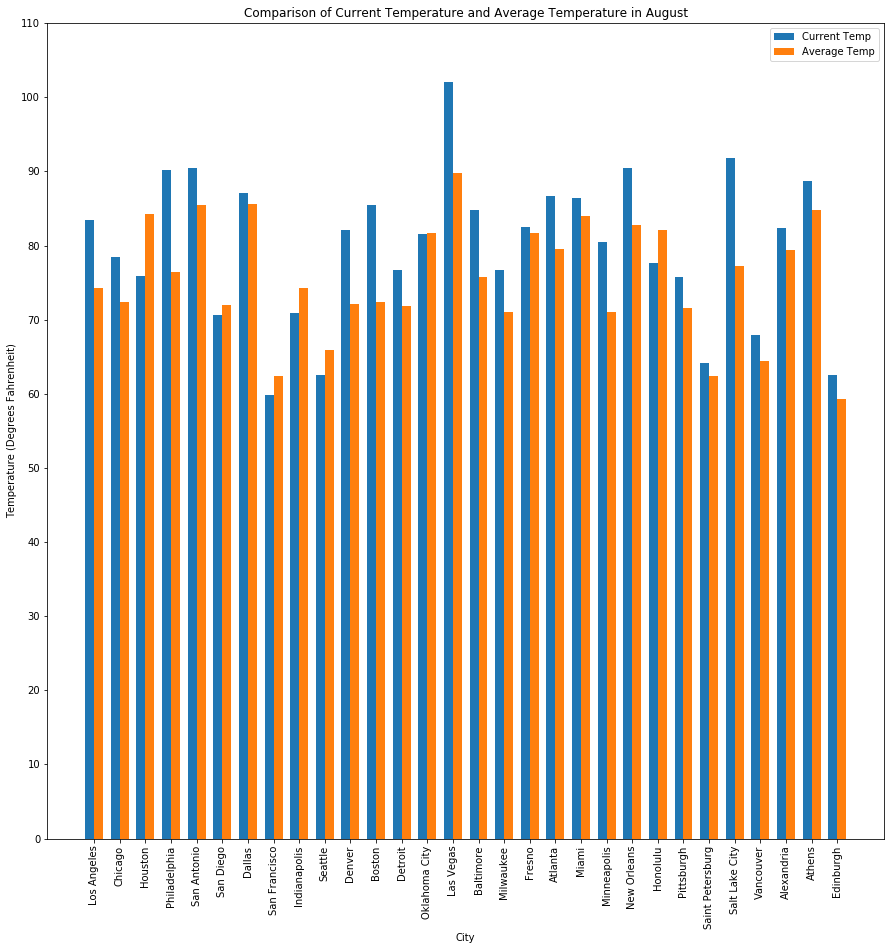

In [519]:
# Vertical bar plot
# Current Weather (Aug. 2) and Average August Temp being compared 


indx = np.arange(len(df1['City']))
temp_label = np.arange(0, 120, 10)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15, 15))
current = ax.bar(indx - bar_width/2, df1['Current Temp'], bar_width, label = "Current Temp")
average = ax.bar(indx + bar_width/2, df1['Average Temp'], bar_width, label = "Average Temp")
# insert x-axis label
ax.set_xticks(indx)
ax.set_xticklabels(df1['City'], rotation = 'vertical')
# insert y-axis label
ax.set_yticks(temp_label)
ax.set_yticklabels(temp_label)
# insert legend
ax.set(xlabel="City", ylabel="Temperature (Degrees Fahrenheit)", title = 'Comparison of Current Temperature and Average Temperature in August')
ax.legend()

plt.show()

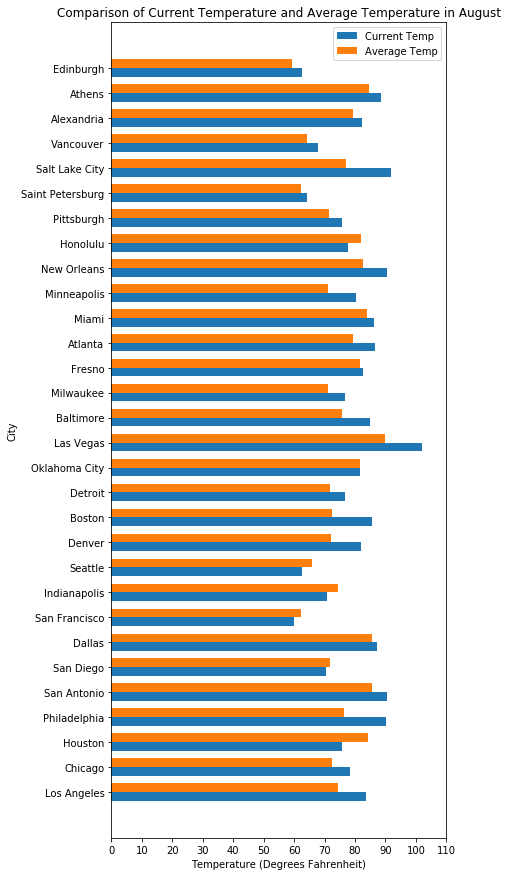

In [520]:
# Data Visualization #1 - Merged DF
# horizonal bar plot

indx = np.arange(len(df1['City']))
temp_label = np.arange(0, 120, 10)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 15))
current = ax.barh(indx - bar_width/2, df1['Current Temp'], bar_width, label = "Current Temp")
average = ax.barh(indx + bar_width/2, df1['Average Temp'], bar_width, label = "Average Temp")
# insert x-axis label
ax.set_xticks(temp_label)
ax.set_xticklabels(temp_label)
# insert y-axis label
ax.set_yticks(indx)
ax.set_yticklabels(df1['City'])
# insert legend
ax.set(ylabel="City", xlabel="Temperature (Degrees Fahrenheit)", title = 'Comparison of Current Temperature and Average Temperature in August')
ax.legend()

plt.show()

# Data Visualization #2 - Single df

In [521]:
# Find data for Milwaukee, WI (close to where I live!)
cursor = conn.cursor()
df3 = pd.read_sql_query("SELECT * FROM AverageTemperatures WHERE City == 'Milwaukee';", conn)

In [522]:
df3

Country       City    Jan    Feb    Mar    Apr    May    Jun    Jul  \
0  United States  Milwaukee  22.64  26.24  35.42  46.04  55.94  66.56  72.14   

     Aug    Sep    Oct    Nov    Dec  Avg_Temp_Yr      Continent  
0  71.06  63.32  51.62  39.38  26.78        48.02  North America

In [523]:
df3.unstack()

Country      0    United States
City         0        Milwaukee
Jan          0            22.64
Feb          0            26.24
Mar          0            35.42
Apr          0            46.04
May          0            55.94
Jun          0            66.56
Jul          0            72.14
Aug          0            71.06
Sep          0            63.32
Oct          0            51.62
Nov          0            39.38
Dec          0            26.78
Avg_Temp_Yr  0            48.02
Continent    0    North America
dtype: object

In [525]:
col = ['Month', 'AvgTemp']

In [526]:
# Create dict with Milwaukee's info
d= {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],'AvgTemp': [22.64, 26.24, 35.42, 46.04, 55.94, 66.56, 72.14, 71.06, 63.32, 51.62, 39.38, 26.78]}

In [527]:
# create df out of dict 
mil = pd.DataFrame(d, columns = col)

In [528]:
# View the data for Milwaukee
mil

Month  AvgTemp
0    Jan    22.64
1    Feb    26.24
2    Mar    35.42
3    Apr    46.04
4    May    55.94
5    Jun    66.56
6    Jul    72.14
7    Aug    71.06
8    Sep    63.32
9    Oct    51.62
10   Nov    39.38
11   Dec    26.78

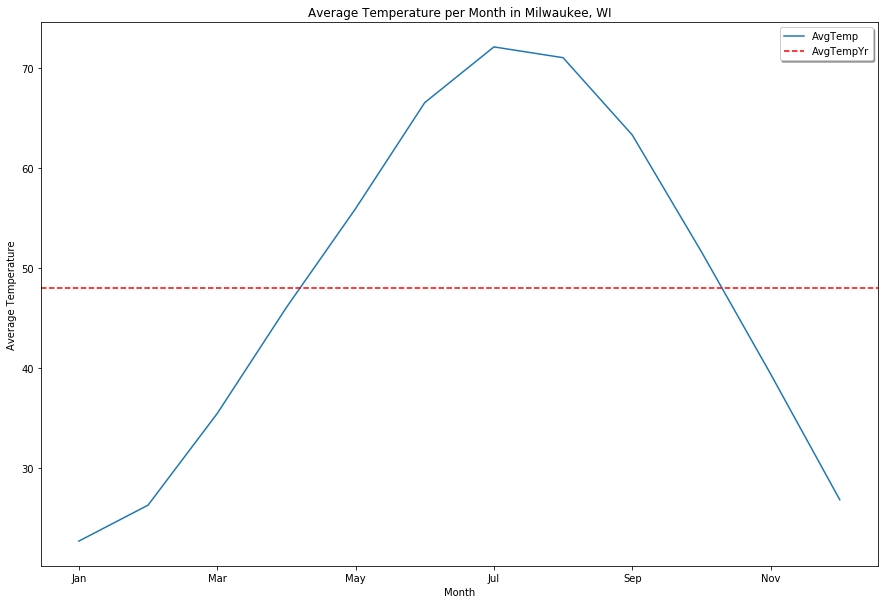

In [529]:
# Line graph of average temps per month in Milwaukee
# Red line = avg yearly temp

mil.plot(kind='line', x= 'Month', y='AvgTemp',figsize=(15, 10))
plt.title("Average Temperature per Month in Milwaukee, WI")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.axhline(48.02, color='r', linestyle='--', label = 'AvgTempYr')
plt.legend(loc='best', shadow=True)
plt.show()

# Data Visualization # 3 - Merged df

In [530]:
# Line graph displaying average temp, current temp, and feels like temp

In [531]:
# Query the necessary data
# Need to use back ticks when column name has spaces

cursor = conn.cursor()
df2 = pd.read_sql_query("SELECT CurrentWeather.City, Temperature, `Feels Like Temp`, Aug FROM CurrentWeather INNER JOIN AverageTemperatures ON AverageTemperatures.City = CurrentWeather.City;", conn)

In [532]:
df2.head()

City  Temperature  Feels Like Temp    Aug
0   Los Angeles        83.48            84.81  74.30
1       Chicago        78.49            78.66  72.32
2       Houston        75.87            81.01  84.20
3  Philadelphia        90.21            94.01  76.46
4   San Antonio        90.41            96.33  85.46

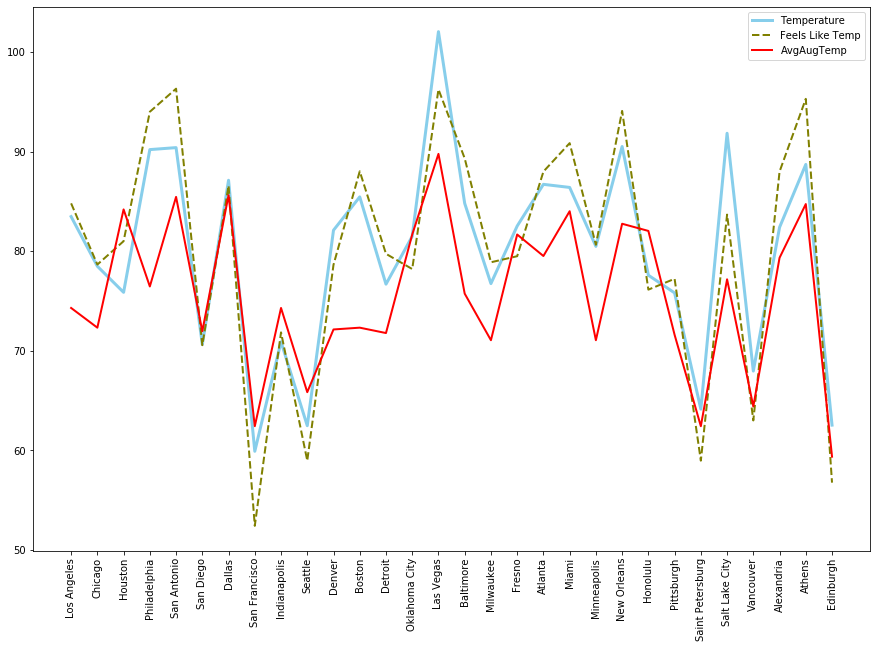

In [555]:
# Create line graph
plt.figure(figsize=(15,10))
plt.plot('City', 'Temperature', data=df2, color='skyblue', linewidth=3)
plt.plot('City', 'Feels Like Temp', data=df2, color='olive', linewidth=2, linestyle='dashed')
plt.plot('City', 'Aug', data=df2, marker='', color='red', linewidth=2, label="AvgAugTemp")
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()


# Data Visualization #4 - Single df


In [534]:
# New query
cursor = conn.cursor()
us = pd.read_sql_query("SELECT * FROM AverageTemperatures WHERE Country == 'United States';", conn)

In [535]:
us.shape

(52, 16)

In [536]:
us.head(10)

Country                       City    Jan    Feb    Mar    Apr  \
0  United States    Albuquerque, New Mexico  36.32  41.36  48.02  55.94   
1  United States          Anchorage, Alaska  17.06  20.12  26.60  36.86   
2  United States                    Atlanta  43.52  47.48  54.68  62.06   
3  United States              Austin, Texas  51.44  55.04  61.70  69.26   
4  United States                  Baltimore  33.44  36.32  44.24  54.32   
5  United States               Boise, Idaho  31.28  36.50  44.42  50.72   
6  United States                     Boston  29.30  32.00  38.66  48.38   
7  United States  Charlotte, North Carolina  41.18  44.96  52.34  60.44   
8  United States                    Chicago  23.72  27.68  37.76  48.92   
9  United States             Columbus, Ohio  29.12  32.36  41.54  52.70   

     May    Jun    Jul    Aug    Sep    Oct    Nov    Dec  Avg_Temp_Yr  \
0  65.66  74.84  78.26  76.28  69.26  57.56  44.96  36.32        57.20   
1  47.84  55.22  58.82  56.66  48.56  34.88  22.28  19.04        37.04   
2  70.34  77.36  80.42  79.52  73.58  63.32  54.14  45.50        62.60   
3  76.64  82.22  84.92  85.82  80.06  71.24  60.98  52.52        69.26   
4  63.68  73.04  77.54  75.74  68.36  56.66  46.94  37.22        55.58   
5  59.18  67.46  75.74  74.66  64.94  52.88  39.92  30.74        52.52   
6  58.28  68.00  73.76  72.32  65.12  54.32  44.96  35.06        51.62   
7  68.54  76.46  79.52  78.44  71.96  61.34  51.98  43.34        60.98   
8  59.00  68.90  73.94  72.32  64.58  52.52  40.28  27.68        49.64   
9  62.24  71.24  74.84  73.58  66.38  54.68  44.06  33.08        53.06   

       Continent  
0  North America  
1  North America  
2  North America  
3  North America  
4  North America  
5  North America  
6  North America  
7  North America  
8  North America  
9  North America

In [537]:
# Average yearly temperature for all US cities
mean_temp = us['Avg_Temp_Yr'].mean()
print(mean_temp)

59.61615384615386


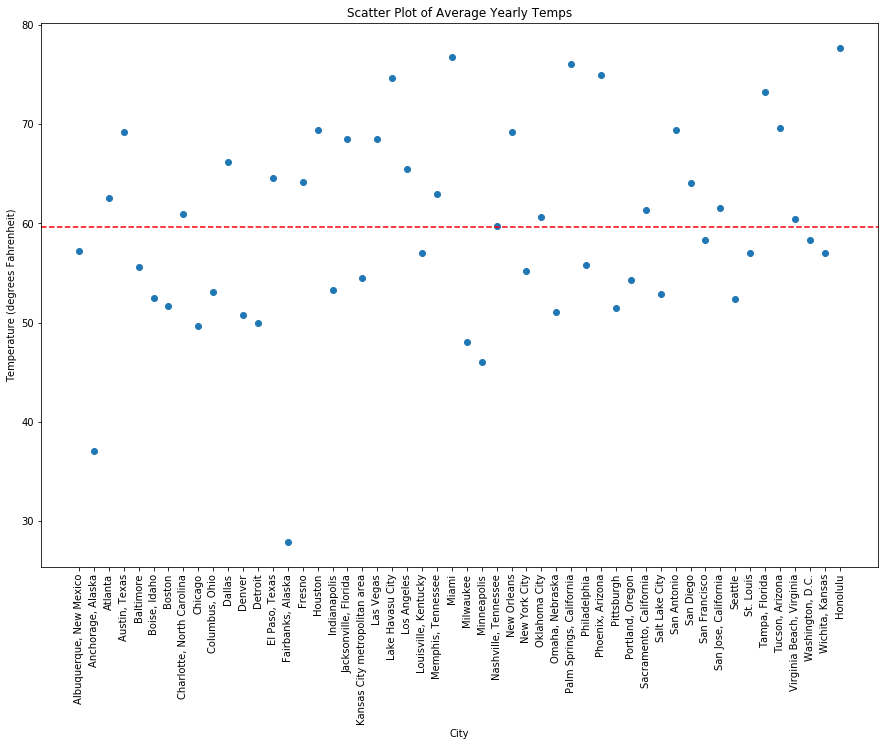

In [554]:
# Create scatter plot of all average yearly temps for US cities
# Mean value is shown in red
plt.figure(figsize=(15,10))
plt.scatter(x=us.City, y=us.Avg_Temp_Yr)
plt.title('Scatter Plot of Average Yearly Temps')
plt.xlabel('City')
plt.xticks(rotation = 'vertical')
plt.ylabel('Temperature (degrees Fahrenheit)')
plt.axhline(mean_temp, color='r', linestyle='--', label = 'Avg')
plt.show()

## Data Visualization #5 - Single df

In [539]:
# final query
cursor = conn.cursor()
df5 = pd.read_sql_query("SELECT * FROM AverageTemperatures;", conn)

In [540]:
df5.head()

Country         City    Jan    Feb    Mar    Apr    May    Jun     Jul  \
0  Algeria      Algiers  52.16  53.42  55.04  58.46  63.86  70.34   76.28   
1  Algeria  Tamanrasset  55.04  59.00  64.58  71.96  78.98  84.02   83.66   
2  Algeria      Reggane  60.80  64.76  73.58  82.22  89.96  97.52  103.64   
3   Angola       Luanda  80.06  83.30  83.48  82.76  80.60  75.02   71.78   
4    Benin      Cotonou  81.14  83.30  84.02  83.48  82.04  79.70   78.44   

      Aug    Sep    Oct    Nov    Dec  Avg_Temp_Yr Continent  
0   77.36  73.76  66.92  59.36  53.78        63.32    Africa  
1   82.76  79.70  72.32  63.14  57.02        71.06    Africa  
2  101.12  95.90  84.56  71.60  64.04        82.94    Africa  
3   71.78  74.30  77.36  80.06  80.42        78.44    Africa  
4   78.08  78.80  80.06  81.68  81.14        80.96    Africa

In [541]:
df5['Country'].value_counts()

United States    52
Argentina        17
Canada           15
Brazil           14
Russia           12
                 ..
Nepal             1
Croatia           1
Indonesia         1
Netherlands       1
Panama            1
Name: Country, Length: 173, dtype: int64

In [542]:
# empty lists that query will append to
continents = []
entries = []
for n, c in cursor.execute("SELECT count(*), Continent FROM AverageTemperatures GROUP BY Continent"):
    continents.append(c)
    entries.append(n)

In [543]:
continents

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [544]:
entries

[109, 75, 62, 98, 26, 54]

In [545]:
# create column names for df
columns = ['Continent', 'Entries']

In [546]:
# create df out of lists 
final_df = pd.DataFrame(list(zip(continents, entries)), columns = columns)

In [547]:
# view df
final_df

Continent  Entries
0         Africa      109
1           Asia       75
2         Europe       62
3  North America       98
4        Oceania       26
5  South America       54

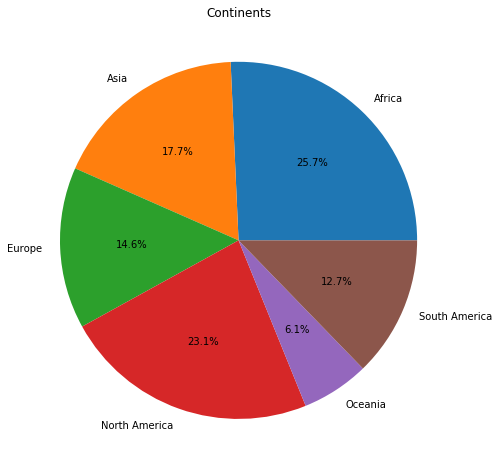

In [553]:
# Pie Chart to show how prevalant each continent is within the dataframe
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(final_df['Entries'], labels=final_df['Continent'], autopct='%0.1f%%')
plt.title("Continents")
plt.show()

In [549]:
# Be sure to close the connection
# conn.close()